## Chapter 2 - Theory

In [1]:
import numpy as np
import matplotlib.pyplot as plt


import sys
sys.path.append('./..')
import cclib as cc
import cde

### Lotka-Volterra

\begin{align}
    \frac{dN}{dt} &= N(a - bN) - cNP \\
    \frac{dP}{dt} &= dP - eNP
\end{align}


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint      # differential equation solver

# plot nullclines
a = 2.5
b = 1
c = 1
d = 1.5
e = 1

def dNdt(N, P):
    return N*(a - b*N) - c*N*P

def dPdt(N, P):
    return d*P - e*N*P

def CDE(y0,t):
    N = y0[0]
    P = y0[1]
    
    dN = dNdt(N,P)
    dP = dPdt(N,P)

    return [dN,dP]

def hairline_data(S=10,dt=0.05,step=[0.5,0.5],verbose=False):
    """
    """

    # get step sizes
    N_step = step[0]
    P_step = step[1]

    #np.arange()
    N_series = np.arange(-0.5,4.0+N_step,N_step)
    P_series = np.arange(-0.5,4.0+P_step,P_step)

    # make space for the data
    N_values = np.full((len(N_series),len(P_series),int(S/dt)),np.nan)
    P_values = np.full((len(N_series),len(P_series),int(S/dt)),np.nan)

    if verbose: print(f'\nN_series: {np.round(N_series,5)}')
    if verbose: print(f'P_series: {np.round(P_series,5)}')
    for i in range(len(N_series)):
        N0 = round(N_series[i],5)
        for j in range(len(P_series)):
            P0 = round(P_series[j],5)

            y0 = [N0,P0]
            #if verbose: print(f'\t\t\t ni0: {ni0}, mi0: {mi0}, ms0: {ms0}')
            t = np.arange(0, S, dt)  
            
            solutions = odeint(CDE, y0, t)
            
            N_values[i,j] = solutions[:, 0]
            P_values[i,j] = solutions[:, 1]

    return N_values, P_values

N_values, P_values = hairline_data(S=100,step=[0.33,0.33],verbose=True)


N_series: [-0.5  -0.17  0.16  0.49  0.82  1.15  1.48  1.81  2.14  2.47  2.8   3.13
  3.46  3.79  4.12]
P_series: [-0.5  -0.17  0.16  0.49  0.82  1.15  1.48  1.81  2.14  2.47  2.8   3.13
  3.46  3.79  4.12]


/tmp/ipykernel_9324/2158322748.py:54: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  solutions = odeint(CDE, y0, t)


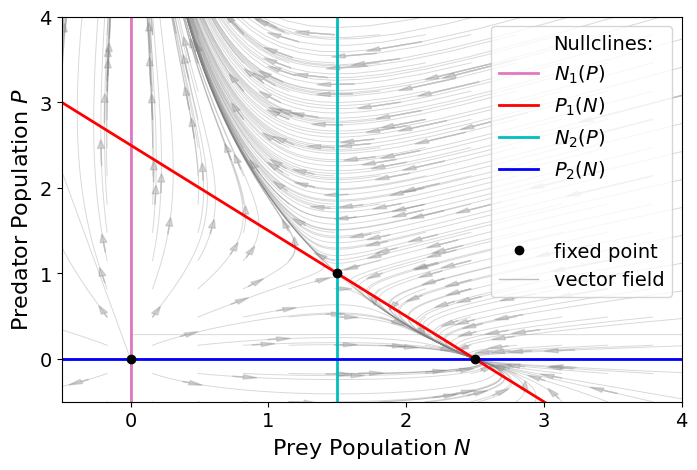

Fix-Points:
(0, 0)
(1.5, 1.0)
(2.5, 0)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

# plot nullclines
a = 2.5
b = 1
c = 1
d = 1.5
e = 1

def dNdt(N, P):
    return N*(a - b*N) - c*N*P

def dPdt(N, P):
    return d*P - e*N*P

def N1(P):
    return 0*P/P

def P1(N):
    return (a-b*N)/c

def N2(P):
    return d/e*P/P

def P2(N):
    return 0*N/N

N_arr = np.linspace(-0.5, 4, 20)
P_arr = np.linspace(-0.5, 4, 20)

X_values = N_values
Y_values = P_values

N_R,P_R,S = X_values.shape

fig, ax = plt.subplots(figsize=(8,5))

arrow_chance = 1
max_position = 10
# - plot X and Y
for i in range(N_R):
    for j in range(P_R):
        try:
            # hairline trajectory
            plt.plot(X_values[i,j],
                        Y_values[i,j],
                        color='grey',
                        linewidth=0.7,
                        alpha=0.3,
                        )
            r = random.random()
            if r <= arrow_chance:
                arrow_position = random.randint(0,max_position-1)
                plt.arrow(X_values[i,j][arrow_position], 
                          Y_values[i,j][arrow_position], 
                          X_values[i,j][arrow_position+1]-X_values[i,j][arrow_position], 
                          Y_values[i,j][arrow_position+1]-Y_values[i,j][arrow_position], 
                          head_width=0.05, 
                          head_length=0.1, 
                          fc='grey', 
                          ec='grey',
                          alpha=0.3,
                          )
        except:
            pass

plt.plot(0,0,marker=None,linewidth=0,label=r'Nullclines:')

plt.plot(N1(P_arr), P_arr, linewidth=2, color="tab:pink", label=r'$N_1(P)$')
plt.plot(N_arr, P1(N_arr), linewidth=2, color="r", label=r'$P_1(N)$')
plt.plot(N2(P_arr), P_arr, linewidth=2, color="c", label=r'$N_2(P)$')
plt.plot(N_arr, P2(N_arr), linewidth=2, color="b", label=r'$P_2(N)$')


plt.plot(0,0, color='black', marker='', linewidth=0, label='\n')

plt.plot(0,0, color='black', marker='o', linewidth=0, label=r'fixed point')
plt.plot(d/e, (a-(b*d/e))/c, color='black', marker='o')
plt.plot(a/b, 0, color='black', marker='o')

plt.plot(0,0,marker='',
        color='grey',
        linewidth=1,
        alpha=0.5,
        label=r'vector field',
        )

plt.legend(fontsize=14)
plt.xlabel(r'Prey Population $N$', fontsize=16)
plt.ylabel(r'Predator Population $P$', fontsize=16, rotation=90)
#plt.title('Nullclines and Fix-Points', fontsize=16)
plt.xticks([0,1,2,3,4],fontsize=14)
plt.yticks([0,1,2,3,4],fontsize=14)
plt.xlim(N_arr[0], N_arr[-1])
plt.ylim(P_arr[0], P_arr[-1])


save_path = '../img/Ch2_Nullclines.png'
plt.savefig(save_path,dpi=500)
plt.show()

print(f"Fix-Points:\n(0, 0)\n({d/e}, {(a-b*d/e)/c})\n({a/b}, 0)")

We fix $a=2.5$, $b=1$, $c=1$, $d=1.5$, $e=1$ and investigate the fiy-point at $(N^*,P^*)=(1.5,1)$. The Jacobian matrix is:

\begin{align*}
J = 
\begin{pmatrix}
    -1.5 & -1.5\\
    -1 & 0
\end{pmatrix}
\end{align*}

Wolfram aplha tells us...

- Eigenvector:<br>
$v_1 = (1/4 (3 + \sqrt{33}), 1)$<br>
$v_2 = (1/4 (3 - \sqrt{33}), 1)$<br>

- Eigenvalue:<br>
$λ_1 = 1/4 (-3 - \sqrt{33})$<br>
$λ_2 = 1/4 (\sqrt{33} - 3)$<br>

We want to plot these...

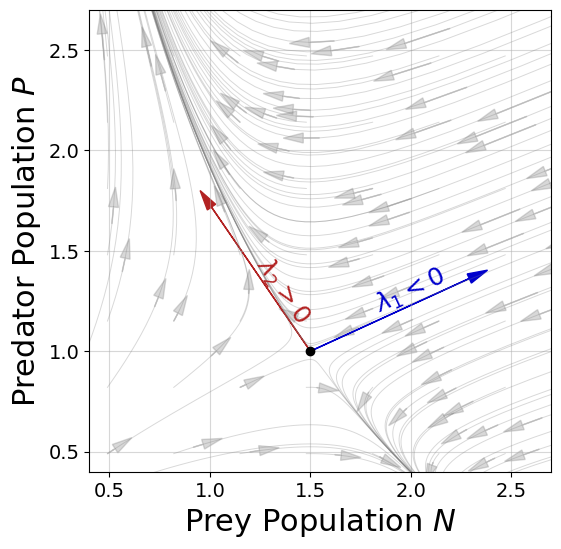

In [4]:
colors = ['mediumblue','firebrick']

vec1 = np.array([(3+np.sqrt(33))/4,1])
vec2 = np.array([(3-np.sqrt(33))/4,1])

l1 = (-3-np.sqrt(33))/4
l2 = (np.sqrt(33)-3)/4

s1 = r"$λ_1 < 0$"#= \frac{1}{4} (-3 - \sqrt{33})$"
s2 = r"$λ_2 > 0$"#= \frac{1}{4} (\sqrt{33} - 3)$"

fixed_point = [1.5, 1.0]

# plot vec1 and vec2 and put s1 and s2 in the legend box
fig, ax = plt.subplots(figsize=(6,6))

# vector field
arrow_chance = 1
max_position = 10
# - plot X and Y
for i in range(N_R):
    for j in range(P_R):
        try:
            # hairline trajectory
            plt.plot(X_values[i,j],
                        Y_values[i,j],
                        color='grey',
                        linewidth=0.7,
                        alpha=0.3,
                        )
            r = random.random()
            if r <= arrow_chance:
                arrow_position = random.randint(0,max_position-1)
                plt.arrow(X_values[i,j][arrow_position], 
                          Y_values[i,j][arrow_position], 
                          X_values[i,j][arrow_position+1]-X_values[i,j][arrow_position], 
                          Y_values[i,j][arrow_position+1]-Y_values[i,j][arrow_position], 
                          head_width=0.05, 
                          head_length=0.1, 
                          fc='grey', 
                          ec='grey',
                          alpha=0.3,
                          )
        except:
            pass

# Normalize the vectors to have the same length
vec1_norm = vec1 / np.linalg.norm(vec1)
vec2_norm = vec2 / np.linalg.norm(vec2)

# Define a uniform length for the arrows
arrow_length = 0.87

plt.arrow(fixed_point[0], fixed_point[1],
          vec1_norm[0] * arrow_length, 
          vec1_norm[1] * arrow_length,
          head_width=0.05, 
          head_length=0.1, 
          color=colors[0])
plt.arrow(fixed_point[0], fixed_point[1],
          vec2_norm[0] * arrow_length, 
          vec2_norm[1] * arrow_length,
          head_width=0.05, 
          head_length=0.1, 
          color=colors[1])
plt.plot(d/e, (a-(b*d/e))/c, color='black', marker='o')

ax.annotate(s1,
            xy=(1.8,1.3),
            xytext=(-0.2,0.2),
            rotation=25,
            textcoords='offset points',
            fontsize=18,
            va='center',
            color=colors[0])
ax.annotate(s2,
            xy=(1.2,1.3),
            xytext=(0.2,0.2),
            rotation=-55,
            textcoords='offset points',
            fontsize=18,
            va='center',
            color=colors[1])

plt.plot([0], [0], color='mediumblue', label=s1)
plt.plot([0], [0], color='firebrick', label=s2)
#plt.legend(loc='upper right',fontsize=22)
plt.xlabel(r'Prey Population $N$', fontsize=22)
plt.ylabel(r'Predator Population $P$', fontsize=22, rotation=90)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(alpha=0.5)
plt.xlim(0.4,2.7)
plt.ylim(0.4,2.7)

# Set the aspect ratio to be equal
ax.set_aspect('equal', adjustable='box')

save_path = '../img/Ch2_Eigenvector.png'
plt.savefig(save_path,dpi=500)
plt.show()

## Chapter 3 - Model

\begin{align*}
    \frac{d n_I}{dt} &= (1-q)  \tau (n_S p_{S \rightarrow I} - n_I p_{I \rightarrow S})\\
    \frac{d m_I}{dt} &= (1-q)  \tau (m_{SI} p_{S \rightarrow I} - 2 m_I p_{I \rightarrow S}) + q  \tau n_I P_I^S\\
    \frac{d m_S}{dt} &= (1-q)  \tau (m_{SI} p_{I \rightarrow S} - 2 m_S p_{S \rightarrow I}) + q  \tau n_S P_S^I
\end{align*}

We list the used expressions again for a better overview

\begin{align*}
    p_{S \rightarrow I} &= \sum_{k=1}^T \left[ {T \choose k} \left( p P_S^I \right)^k \left(1 - p P_S^I \right)^{T-k} \int_{d=d^*}^{\infty} f^{k*} \left( d \right) \,dd \right] \enspace ,\\
    p_{I \rightarrow S} &= \sum_{k=1}^T \left[ {T \choose k} \left( p P_I^I \right)^k \left(1 - p P_I^I \right)^{T-k} \int_{0}^{d<d^*} f^{k*} \left( d \right) \,dd \right] + \left(1 - p P_I^I \right)^T \enspace ,
\end{align*}

\begin{align*}
    P_I^S &= \frac{m_{SI}}{2 m_I + m_{SI}} \enspace , \\
    P_S^I &= \frac{m_{SI}}{2 m_S + m_{SI}} \enspace , \\
    P_I^I &= \frac{2 m_I}{2 m_I + m_{SI}} \enspace , \\
    n_S &= 1 - n_I \enspace , \\
    m_{SI} &= m - m_I - m_S \enspace , 
\end{align*}

as well as the used constraints

\begin{align}
    1 > T \tau \enspace ,\\
    d_i^* = \bar{d^*} \enspace \forall i \enspace .
\end{align}

## Chapter 4 - Results and Discussion

### Similarities

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

import sys
sys.path.insert(1, '../')
import cclib as cc
import cde

In [8]:

# Experimental Data
fp_exp = "./exp03.pkl"
df_exp = pd.read_pickle(fp_exp)

# round all entries in the columns 'p' and 'q' to 2 decimal places
df_exp['p'] = df_exp['p'].round(2)
df_exp['q'] = df_exp['q'].round(2)

print(f">> Experimental Data")
display(df_exp)

x_param = 'p'
y_param = 'q'
fix_param = {'nu':0.05,'r':1,'T':12,'n':0.49}
val_param = 'Ni_mean'

p_exp,q_exp,ni_exp = cc.heatmap_fromDF(df_exp,
                                          fix_param,
                                          x_param,
                                          y_param,
                                          val_param,
                                          vmax=None,
                                          show=False,
                                          value=False,
                                          save=False,
                                          figsize=(22,16),
                                          )

# Analytic Data
fp_ana = "./N500beta0o02ds3fs1nu0o05_ana03_compress.pkl"
df_ana = pd.read_pickle(fp_ana)

# change column header 'f' to 'nu'
df_ana.rename(columns={'f':'nu'}, inplace=True)
# round all entries in the columns 'p' and 'q' to 2 decimal places
df_ana['p'] = df_ana['p'].round(2)
df_ana['q'] = df_ana['q'].round(2)

# fill missing data points
df_ana.loc[(df_ana['p'] > 0.8) & (df_ana['q'] < 0.3), 'ni'] = 1.0

print(f"\n>> Analytic Data")
display(df_ana)

x_param = 'p'
y_param = 'q'
fix_param = {'nu':0.05,'T':12,'n':0.49}
val_param = 'ni'

p_ana,q_ana,ni_ana = cc.heatmap_fromDF(df_ana,
                                          fix_param,
                                          x_param,
                                          y_param,
                                          val_param,
                                          vmax=None,
                                          show=False,
                                          value=False,
                                          save=False,
                                          figsize=(22,16),
                                          )

>> Experimental Data


,n,T,nu,p,r,q,ns_mean,ns_std,s_mean,s_std,<s>_mean,<s>_std,S_mean,S_std,runtime_mean,runtime_std,Ni_mean,Ni_std,num_samples
0,0.01,12.0,0.05,0.0,1.0,0.00,1.00,0.000000,500.000000,0.000000,NaN,NaN,500.00,0.000000,56.0,35.777088,0.0,0.000000,5
1,0.01,12.0,0.05,0.0,1.0,0.01,1.00,0.000000,500.000000,0.000000,NaN,NaN,500.00,0.000000,56.0,15.165751,0.0,0.000000,5
2,0.01,12.0,0.05,0.0,1.0,0.02,1.00,0.000000,500.000000,0.000000,NaN,NaN,500.00,0.000000,62.0,32.710854,0.0,0.000000,5
3,0.01,12.0,0.05,0.0,1.0,0.03,1.00,0.000000,500.000000,0.000000,NaN,NaN,500.00,0.000000,68.0,30.331502,0.0,0.000000,5
4,0.01,12.0,0.05,0.0,1.0,0.04,1.20,0.447214,450.000000,111.803399,352.139177,NaN,499.80,0.447214,62.0,16.431677,0.0,0.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499844,0.49,12.0,0.05,1.0,1.0,0.96,2.00,0.000000,250.000000,0.000000,82.024387,13.711309,308.00,9.695360,905.0,73.257537,308.0,9.695360,4
499845,0.49,12.0,0.05,1.0,1.0,0.97,2.25,0.500000,229.166667,41.666667,75.016440,48.553985,285.25,4.349329,797.5,83.016063,285.5,4.203173,4
499846,0.49,12.0,0.05,1.0,1.0,0.98,2.00,0.000000,250.000000,0.000000,31.112698,5.773503,272.00,4.082483,982.5,41.129876,272.0,4.082483,4
499847,0.49,12.0,0.05,1.0,1.0,0.99,2.00,0.000000,250.000000,0.000000,14.142136,6.000000,260.00,4.242641,952.5,209.025517,260.0,4.242641,4



>> Analytic Data


,n,beta,T,nu,p,q,ni,runtime
0,0.01,0.02,12,0.05,0.0,0.00,-7.596655e-12,1000
1,0.01,0.02,12,0.05,0.0,0.01,-1.811312e-12,1000
2,0.01,0.02,12,0.05,0.0,0.02,-1.455721e-11,1000
3,0.01,0.02,12,0.05,0.0,0.03,-4.084112e-12,1000
4,0.01,0.02,12,0.05,0.0,0.04,-6.019105e-12,1000
...,...,...,...,...,...,...,...,...
510045,0.49,0.02,12,0.05,1.0,0.96,6.146833e-01,1000
510046,0.49,0.02,12,0.05,1.0,0.97,5.726174e-01,1000
510047,0.49,0.02,12,0.05,1.0,0.98,5.409877e-01,1000
510048,0.49,0.02,12,0.05,1.0,0.99,5.140825e-01,1000


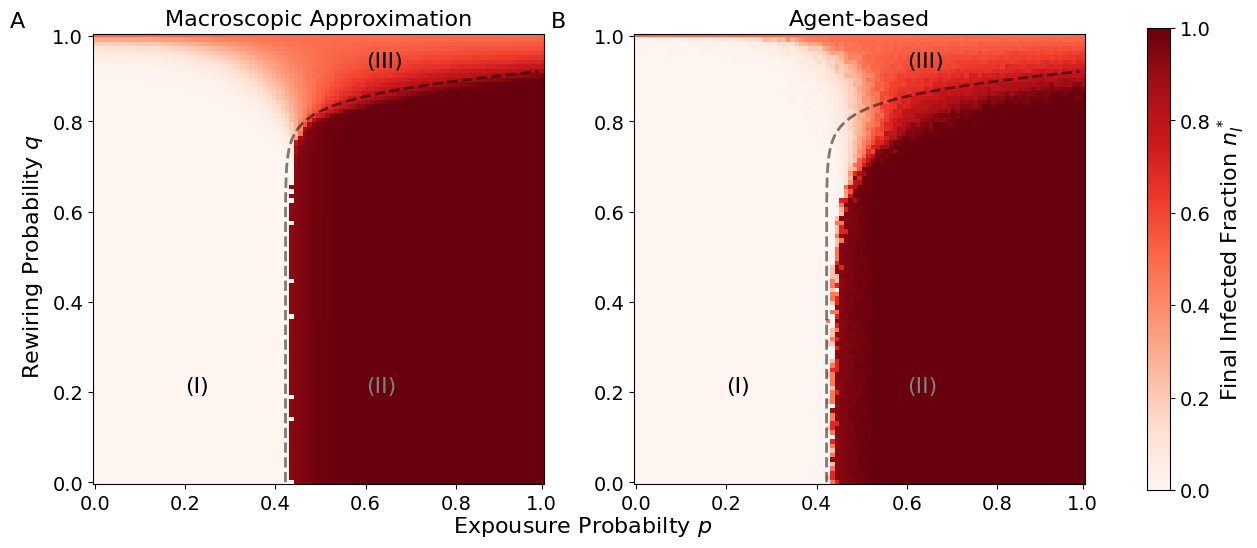

In [9]:
import matplotlib as mpl

p_b = 0.43
q_f = 0.70
q_c = 0.95

# Fit custom sigmoid model to edge on numerical analysis
# >> Data points for edge on numerical analysis
y_data = np.array([0, 20, 60, 78, 83, 84, 86, 88, 90, 91, 92])
x_data = np.array([43, 43, 43, 44, 47, 54, 60, 70, 80, 90, 100])

# >> Custom sigmoid-like function
def custom_sigmoid(x, a, b, c, d):
    return a + b / (1 + np.exp(-c * (x - d)))

# >> Fit custom sigmoid model
popt_sigmoid, _ = curve_fit(custom_sigmoid, y_data, x_data, p0=[40, 60, 0.1, 50],maxfev=10000)
# >> Generate smooth x values for plotting
y_smooth = np.linspace(min(y_data), max(y_data), 500)
# >> Evaluate fitted functions
x_sigmoid = custom_sigmoid(y_smooth, *popt_sigmoid)

# take the data from the two plots above and plot them together in two subplots, make sure that each cell is square
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
cmap = mpl.colormaps.get_cmap('Reds')  # viridis is the default colormap for imshow

# plot the analytical data
im = ax[0].imshow(ni_ana, cmap=cmap, origin='lower')
#ax[0].set_xlabel('exposure probability p', fontsize=16)
ax[0].set_title('Macroscopic Approximation',fontsize=16)
ax[0].set_xticks(np.array([0.0,0.2,0.4,0.6,0.8,0.99])*len(p_ana))
ax[0].set_xticklabels(np.array([0.0,0.2,0.4,0.6,0.8,1.0]),fontsize=14)
ax[0].set_yticks(np.array([0.0,0.2,0.4,0.6,0.8,0.99])*len(q_ana))
ax[0].set_yticklabels(np.array([0.0,0.2,0.4,0.6,0.8,1.0]),fontsize=14)
#ax[0].plot(x_data,y_data,color='blue',marker='x',linewidth=0)
ax[0].plot(x_sigmoid,y_smooth,
           color='black',
           linestyle='--',
           linewidth=2,
           alpha=0.5,
           )
ax[0].text(-0.15, 1.05, 'A', transform=ax[0].transAxes, fontsize=16, va='top', ha='right')


# plot the experimental data
im = ax[1].imshow(ni_exp/500, cmap=cmap, origin='lower')
ax[1].set_title('Agent-based',fontsize=16)
ax[1].set_xticks(np.array([0.0,0.2,0.4,0.6,0.8,0.99])*len(p_exp))
ax[1].set_xticklabels(np.array([0.0,0.2,0.4,0.6,0.8,1.0]),fontsize=14)
ax[1].set_yticks(np.array([0.0,0.2,0.4,0.6,0.8,0.99])*len(q_exp))
ax[1].set_yticklabels(np.array([0.0,0.2,0.4,0.6,0.8,1.0]),fontsize=14)
ax[1].plot(x_sigmoid,y_smooth,
           color='black',
           linestyle='--',
           linewidth=2,
           alpha=0.5,
           )
ax[1].text(-0.15, 1.05, 'B', transform=ax[1].transAxes, fontsize=16, va='top', ha='right')

# annotate regions
ax[0].annotate('(I)', xytext=(0.2*len(p_ana), 0.2*len(q_ana)), xy=(0,0), fontsize=16, color='black')
ax[0].annotate('(II)', xytext=(0.6*len(p_ana), 0.2*len(q_ana)), xy=(0,0), fontsize=16, color='grey')
ax[0].annotate('(III)', xytext=(0.6*len(p_ana), 0.92*len(q_ana)), xy=(0,0), fontsize=16, color='black')
ax[1].annotate('(I)', xytext=(0.2*len(p_exp), 0.2*len(q_exp)), xy=(0,0), fontsize=16, color='black')
ax[1].annotate('(II)', xytext=(0.6*len(p_exp), 0.2*len(q_exp)), xy=(0,0), fontsize=16, color='grey')
ax[1].annotate('(III)', xytext=(0.6*len(p_exp), 0.92*len(q_exp)), xy=(0,0), fontsize=16, color='black')

# include one colorbar for both plots at the right side
cbar = fig.colorbar(im, ax=ax, orientation='vertical', shrink=1, label=r'Final Infected Fraction $n_{I}^*$')
cbar.ax.yaxis.label.set_size(16)
cbar.ax.tick_params(labelsize=14)

# add a common x- and y-label
fig.text(0.35, 0.05, r'Expousure Probabilty $p$', va='center', rotation='horizontal', fontsize=16)
fig.text(0.08, 0.5, r'Rewiring Probability $q$', va='center', rotation='vertical', fontsize=16)

#plt.savefig('../img/Ch4_Similarities.png', dpi=500, bbox_inches='tight')
plt.show()


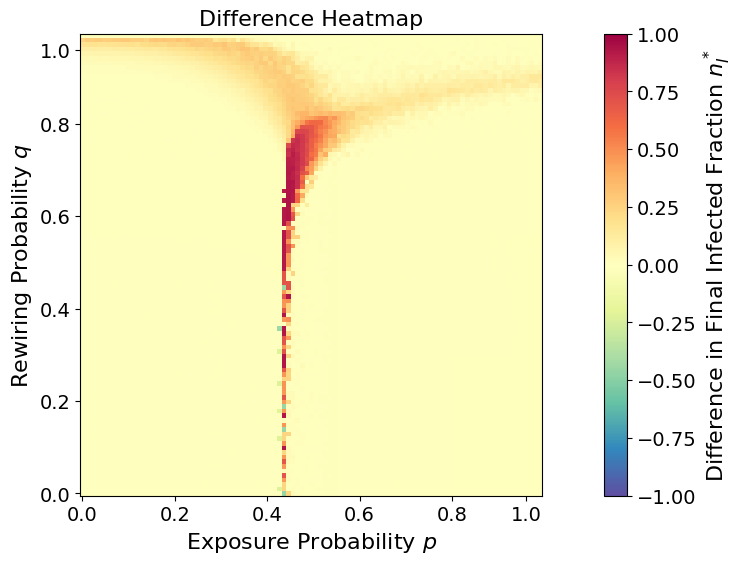

In [10]:
# Calculate the difference between the two heatmaps
heatmap_diff = ni_ana - ni_exp[:,:]/500

# Plot the difference heatmap
fig, ax = plt.subplots(figsize=(16, 6))
cmap = mpl.colormaps.get_cmap('Spectral_r')  # Use a diverging colormap for difference

im = ax.imshow(heatmap_diff, cmap=cmap, origin='lower',vmin=-1,vmax=1)
ax.set_title('Difference Heatmap', fontsize=16)
ax.set_xticks(np.array([0.0,0.2,0.4,0.6,0.8,0.96])*len(p_exp))
ax.set_xticklabels(np.array([0.0,0.2,0.4,0.6,0.8,1.0]), fontsize=14)
ax.set_yticks(np.array([0.0,0.2,0.4,0.6,0.8,0.96])*len(q_exp))
ax.set_yticklabels(np.array([0.0,0.2,0.4,0.6,0.8,1.0]), fontsize=14)

# Include a colorbar for the difference heatmap
cbar = fig.colorbar(im, ax=ax, orientation='vertical', shrink=1, label='Difference in Final Infected Fraction $n_{I}^*$')
cbar.ax.yaxis.label.set_size(16)
cbar.ax.tick_params(labelsize=14)

# Add labels
ax.set_xlabel(r'Exposure Probability $p$', fontsize=16)
ax.set_ylabel(r'Rewiring Probability $q$', fontsize=16)

plt.savefig('../img/Ch4_Similarities_subs.png', dpi=500, bbox_inches='tight')
plt.show()

# extract row where q = 0.85
static_diff = heatmap_diff[85,:]

### Runtime

In [11]:
#Coefficient of Variation of the Computation time

x_param = 'p'
y_param = 'q'
fix_param = {'nu':0.05,'r':1,'T':12,'n':0.49}
val_param = 'runtime_mean'

p_exp,q_exp,time_exp = cc.heatmap_fromDF(df_exp,
                                          fix_param,
                                          x_param,
                                          y_param,
                                          val_param,
                                          vmax=None,
                                          show=False,
                                          value=False,
                                          save=False,
                                          figsize=(22,16),
                                          )


val_param = 'runtime_std'
p_exp,q_exp,time_std_exp = cc.heatmap_fromDF(df_exp,
                                          fix_param,
                                          x_param,
                                          y_param,
                                          val_param,
                                          vmax=None,
                                          show=False,
                                          value=False,
                                          save=False,
                                          figsize=(22,16),
                                          )

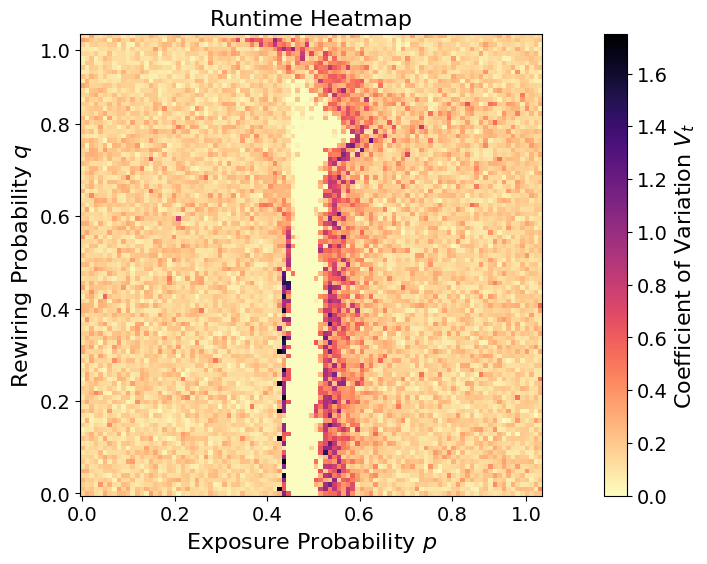

In [12]:
# Plot the difference heatmap
fig, ax = plt.subplots(figsize=(16, 6))
cmap = mpl.colormaps.get_cmap('magma_r')  # Use a diverging colormap for difference

im = ax.imshow(time_std_exp/time_exp, cmap=cmap, origin='lower')
#im = ax.imshow(time_exp, cmap=cmap, origin='lower')
ax.set_title('Runtime Heatmap', fontsize=16)
ax.set_xticks(np.array([0.0,0.2,0.4,0.6,0.8,0.96])*len(p_exp))
ax.set_xticklabels(np.array([0.0,0.2,0.4,0.6,0.8,1.0]), fontsize=14)
ax.set_yticks(np.array([0.0,0.2,0.4,0.6,0.8,0.96])*len(q_exp))
ax.set_yticklabels(np.array([0.0,0.2,0.4,0.6,0.8,1.0]), fontsize=14)

# Include a colorbar for the difference heatmap
cbar = fig.colorbar(im, ax=ax, orientation='vertical', shrink=1, label='Coefficient of Variation $V_t$')
cbar.ax.yaxis.label.set_size(16)
cbar.ax.tick_params(labelsize=14)

# Add labels
ax.set_xlabel(r'Exposure Probability $p$', fontsize=16)
ax.set_ylabel(r'Rewiring Probability $q$', fontsize=16)

#plt.savefig('../img/Ch4_Runtime.png', dpi=500, bbox_inches='tight')
plt.show()

In [13]:
# Experimental Data
fp_time = "./exp12.pkl"
df_time = pd.read_pickle(fp_time)

# round all entries in the columns 'p' and 'q' to 2 decimal places
df_time['p'] = df_time['p'].round(2)
df_time['q'] = df_time['q'].round(2)

print(f">> Experimental Data")
display(df_time)

>> Experimental Data


,n,T,nu,p,r,q,ns_mean,ns_std,s_mean,s_std,<s>_mean,<s>_std,S_mean,S_std,runtime_mean,runtime_std,Ni_mean,Ni_std,num_samples
0,0.49,12.0,0.05,0.00,1.0,0.2,1.125000,0.353553,468.750000,88.388348,352.139177,NaN,499.875000,0.353553,142.500000,27.645718,0.0,0.0,8
1,0.49,12.0,0.05,0.01,1.0,0.2,1.000000,0.000000,500.000000,0.000000,NaN,NaN,500.000000,0.000000,152.500000,35.355339,0.0,0.0,8
2,0.49,12.0,0.05,0.02,1.0,0.2,1.000000,0.000000,500.000000,0.000000,NaN,NaN,500.000000,0.000000,157.500000,23.145502,0.0,0.0,8
3,0.49,12.0,0.05,0.03,1.0,0.2,1.000000,0.000000,500.000000,0.000000,NaN,NaN,500.000000,0.000000,175.000000,47.207748,0.0,0.0,8
4,0.49,12.0,0.05,0.04,1.0,0.2,1.000000,0.000000,500.000000,0.000000,NaN,NaN,500.000000,0.000000,152.500000,26.049404,0.0,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.49,12.0,0.05,0.96,1.0,0.2,1.000000,0.000000,500.000000,0.000000,NaN,NaN,500.000000,0.000000,162.857143,19.760470,500.0,0.0,7
97,0.49,12.0,0.05,0.97,1.0,0.2,1.000000,0.000000,500.000000,0.000000,NaN,NaN,500.000000,0.000000,152.857143,17.043362,500.0,0.0,7
98,0.49,12.0,0.05,0.98,1.0,0.2,1.000000,0.000000,500.000000,0.000000,NaN,NaN,500.000000,0.000000,170.000000,40.000000,500.0,0.0,7
99,0.49,12.0,0.05,0.99,1.0,0.2,1.142857,0.377964,464.285714,94.491118,352.139177,NaN,499.857143,0.377964,152.857143,26.903708,500.0,0.0,7


[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


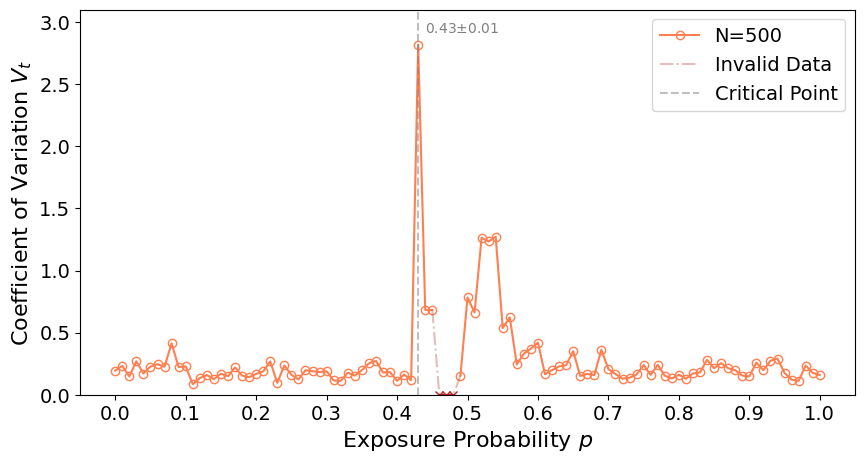

In [14]:
p_values = df_time['p'].values
print(p_values)
runtime_mean = df_time['runtime_mean'].values
runtime_std = df_time['runtime_std'].values
coef_var = runtime_std/runtime_mean
err_ix = np.argwhere(coef_var == 0.0)
coef_var[err_ix] = np.nan
ix_max = np.nanargmax(coef_var)

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(p_values, coef_var,
    color='coral',
    marker='o',
    markerfacecolor='none',
    label='N=500',
    )
ax.plot(p_values[err_ix],
        [0]*len(err_ix),
        linestyle='-.',
        marker='x',
        color='firebrick',
        )

ax.plot([p_values[err_ix[0]-1][0],p_values[err_ix[0]][0]],
        [coef_var[err_ix[0]-1][0],0],
        linestyle='-.',
        color='firebrick',
        marker='none',
        alpha=0.3,
        label=f'Invalid Data',
        )
ax.plot([p_values[err_ix[-1]+1][0],p_values[err_ix[-1]][0]],
        [coef_var[err_ix[-1]+1][0],0],
        linestyle='-.',
        color='firebrick',
        marker='none',
        alpha=0.3,
        )

ax.vlines(p_values[ix_max],0,3.3,
          linestyle='--',
          color='grey',
          alpha=0.5,
          label='Critical Point',
          )
ax.annotate(f"{p_values[ix_max]}"+r"$\pm 0.01$",
            xy=(p_values[ix_max],2.95),
            xytext=(5,0),
            rotation=0,
            textcoords='offset points',
            fontsize=10,
            va='center',
            color='grey')

ax.set_xlabel('Exposure Probability $p$', fontsize=16)
ax.set_ylabel('Coefficient of Variation $V_t$', fontsize=16)
ax.set_ylim(0,2.8+0.3)
ax.set_xticks(np.arange(0,1.1,0.1))

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

plt.legend(fontsize=14)
plt.savefig('../img/Ch4_Runtime.png', dpi=500, bbox_inches='tight')
plt.show()



### Differences

In [15]:
fp_exp = "./N500beta0o02ds3fs1q0o85_exp05_compress.pkl"
df_exp = pd.read_pickle(fp_exp)

# change column header 'f' to 'nu'
df_exp.rename(columns={'f':'nu'}, inplace=True)
# round all entries in the columns 'p' and 'q' to 2 decimal places
df_exp['p'] = df_exp['p'].round(2)
df_exp['nu'] = df_exp['nu'].round(2)

display(df_exp)

x_param = 'p'
y_param = 'nu'
fix_param = {'q':0.85,'T':12,'n':0.45}
val_param = 'Ni_mean'

p_exp,nu_exp,ni_exp = cc.heatmap_fromDF(df_exp,
                                          fix_param,
                                          x_param,
                                          y_param,
                                          val_param,
                                          vmax=None,
                                          show=False,
                                          value=False,
                                          save=False,
                                          figsize=(22,16),
                                          )

fp_ana = "./N500beta0o02ds3fs1q0o85_ana05_compress.pkl"
df_ana = pd.read_pickle(fp_ana)

# change column header 'f' to 'nu'
df_ana.rename(columns={'f':'nu'}, inplace=True)
# round all entries in the columns 'p' and 'q' to 2 decimal places
df_ana['p'] = df_ana['p'].round(2)
df_ana['nu'] = df_ana['nu'].round(2)

# fill missing data points
df_ana.loc[(df_ana['p'] > 0.85), 'ni'] = 1.0

display(df_ana)

x_param = 'p'
y_param = 'nu'
fix_param = {'q':0.85,'T':12,'n':0.45}
val_param = 'ni'

p_ana,nu_ana,ni_ana = cc.heatmap_fromDF(df_ana,
                                          fix_param,
                                          x_param,
                                          y_param,
                                          val_param,
                                          vmax=None,
                                          show=False,
                                          value=False,
                                          save=False,
                                          figsize=(22,16),
                                          )

,n,T,nu,p,r,q,ns_mean,ns_std,s_mean,s_std,<s>_mean,<s>_std,S_mean,S_std,runtime_mean,runtime_std,Ni_mean,Ni_std,num_samples
0,0.45,12.0,0.05,0.00,1.0,0.85,1.111111,0.320256,472.222222,80.064077,352.139177,0.000000,499.888889,0.320256,848.518519,185.071789,0.111111,0.320256,27
1,0.45,12.0,0.05,0.01,1.0,0.85,1.148148,0.362014,462.962963,90.503498,352.139177,0.000000,499.851852,0.362014,796.296296,136.103698,0.148148,0.362014,27
2,0.45,12.0,0.05,0.02,1.0,0.85,1.185185,0.395847,453.703704,98.961848,351.573492,0.774597,499.740741,0.594371,759.259259,113.575658,0.259259,0.594371,27
3,0.45,12.0,0.05,0.03,1.0,0.85,1.037037,0.192450,490.740741,48.112522,352.139177,NaN,499.962963,0.192450,742.222222,135.967568,0.037037,0.192450,27
4,0.45,12.0,0.05,0.04,1.0,0.85,1.111111,0.320256,472.222222,80.064077,352.139177,0.000000,499.888889,0.320256,805.185185,143.965016,0.111111,0.320256,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,0.45,12.0,1.00,0.96,1.0,0.85,1.653846,0.485165,336.538462,121.291131,292.659018,41.989494,471.846154,31.632505,94.230769,16.534347,471.846154,31.632505,26
2016,0.45,12.0,1.00,0.97,1.0,0.85,1.538462,0.508391,365.384615,127.097782,292.540177,32.773616,476.769231,27.574347,96.538462,22.439663,476.769231,27.574347,26
2017,0.45,12.0,1.00,0.98,1.0,0.85,1.500000,0.509902,375.000000,127.475488,317.001409,28.553144,487.076923,19.218581,97.307692,21.827999,487.076923,19.218581,26
2018,0.45,12.0,1.00,0.99,1.0,0.85,1.384615,0.496139,403.846154,124.034735,314.379675,30.933980,489.346154,19.003036,87.307692,23.926168,489.346154,19.003036,26


,n,beta,T,nu,p,q,ni,runtime
0,0.45,0.02,12,0.05,0.0,0.85,2.488869e-04,1000
1,0.45,0.02,12,0.10,0.0,0.85,1.375941e-07,1000
2,0.45,0.02,12,0.15,0.0,0.85,-2.002068e-10,1000
3,0.45,0.02,12,0.20,0.0,0.85,1.397411e-10,1000
4,0.45,0.02,12,0.25,0.0,0.85,-3.549730e-12,1000
...,...,...,...,...,...,...,...,...
2015,0.45,0.02,12,0.80,1.0,0.85,1.000000e+00,1000
2016,0.45,0.02,12,0.85,1.0,0.85,1.000000e+00,1000
2017,0.45,0.02,12,0.90,1.0,0.85,1.000000e+00,1000
2018,0.45,0.02,12,0.95,1.0,0.85,1.000000e+00,1000


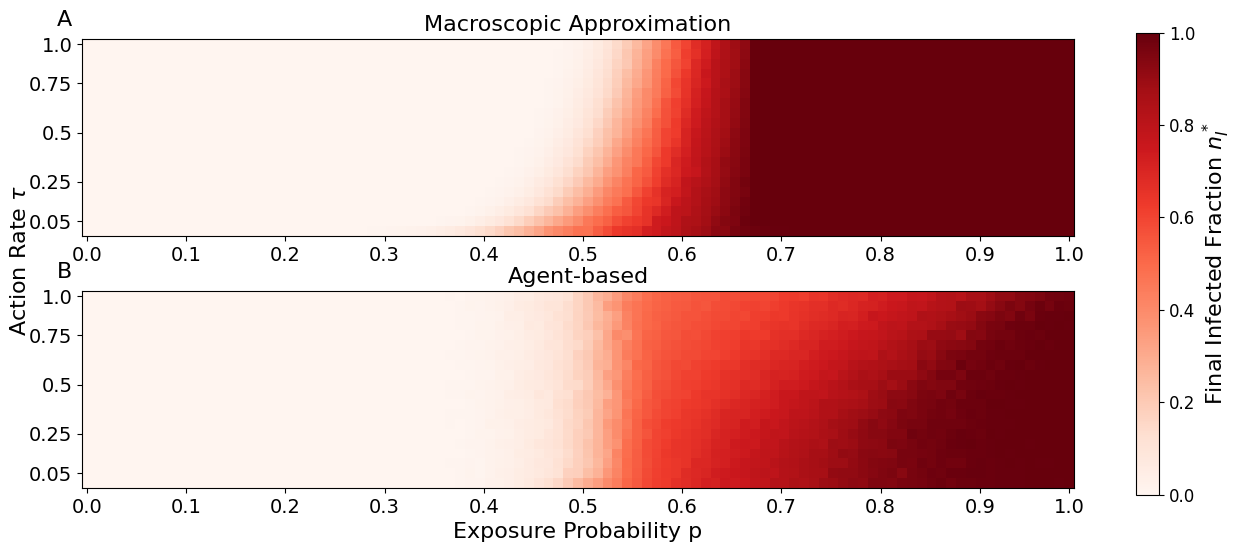

In [16]:
import matplotlib as mpl

# take the data from the two plots above and plot them together in two subplots, make sure that each cell is square
fig, ax = plt.subplots(2, 1, figsize=(16, 6), sharey=True)
cmap = mpl.colormaps.get_cmap('Reds')  # viridis is the default colormap for imshow
# plot the analytical data
im = ax[0].imshow(ni_ana, cmap=cmap, origin='lower')
ax[0].set_title('Macroscopic Approximation', fontsize=16)
ax[0].set_yticks(np.array([0.05, 0.25, 0.5, 0.75, 0.95]) * len(nu_ana))
ax[0].set_yticklabels(np.array([0.05, 0.25, 0.5, 0.75, 1.0]), fontsize=14)
ax[0].set_xticks(np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]) * len(p_ana))
ax[0].set_xticklabels(np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), fontsize=14)
ax[0].text(-0.01, 1.15, 'A', transform=ax[0].transAxes, fontsize=16, va='top', ha='right')

# plot the experimental data
im = ax[1].imshow(ni_exp / 500, cmap=cmap, origin='lower')
ax[1].set_xlabel('Exposure Probability p', fontsize=16)
ax[1].set_title('Agent-based', fontsize=16)
ax[1].set_yticks(np.array([0.05, 0.25, 0.5, 0.75, 0.95]) * len(nu_exp))
ax[1].set_yticklabels(np.array([0.05, 0.25, 0.5, 0.75, 1.0]), fontsize=14)
ax[1].set_xticks(np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]) * len(p_ana))
ax[1].set_xticklabels(np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), fontsize=14)
ax[1].text(-0.01, 1.15, 'B', transform=ax[1].transAxes, fontsize=16, va='top', ha='right')

# include one colorbar for both plots at the right side
cbar = fig.colorbar(im, ax=ax, orientation='vertical', shrink=1, label='Final Infected Fraction $n_{I}^*$')
cbar.ax.yaxis.label.set_size(16)
cbar.ax.tick_params(labelsize=12)

# add a common y-label
fig.text(0.08, 0.5, 'Action Rate $\\tau$', va='center', rotation='vertical', fontsize=16)

# plt.savefig('../img/Ch4_Difference.png', dpi=500, bbox_inches='tight')
plt.show()


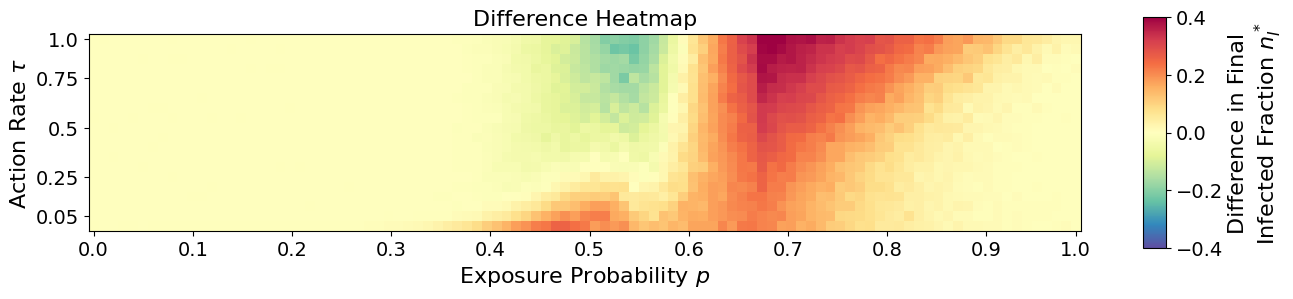

In [17]:
# Calculate the difference between the two heatmaps
heatmap_diff = ni_ana - ni_exp[:,:]/500

# Plot the difference heatmap
fig, ax = plt.subplots(figsize=(16, 6))
cmap = mpl.colormaps.get_cmap('Spectral_r')  # Use a diverging colormap for difference

im = ax.imshow(heatmap_diff, cmap=cmap, origin='lower',vmin=-0.4,vmax=0.4)
ax.set_title('Difference Heatmap', fontsize=16)
ax.set_yticks(np.array([0.05,0.25,0.5,0.75,0.95])*len(nu_ana))
ax.set_yticklabels(np.array([0.05,0.25,0.5,0.75,1.0]),fontsize=14)
ax.set_xticks(np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])*len(p_ana))
ax.set_xticklabels(np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]),fontsize=14)

# Include a colorbar for the difference heatmap
cbar = fig.colorbar(im,
                    ax=ax,
                    orientation='vertical',
                    shrink=0.5,
                    aspect=10,  
                    label='Difference in Final\nInfected Fraction $n_{I}^*$')
cbar.ax.yaxis.label.set_size(16)
cbar.ax.tick_params(labelsize=14)

# Add labels
ax.set_xlabel(r'Exposure Probability $p$', fontsize=16)
ax.set_ylabel('Action Rate $\\tau$', fontsize=16)

#plt.savefig('../img/Ch4_Difference_subs.png', dpi=500, bbox_inches='tight')
plt.show()

Same plot again, but now also subtract the difference for tau=0.05 and q = 0.85.

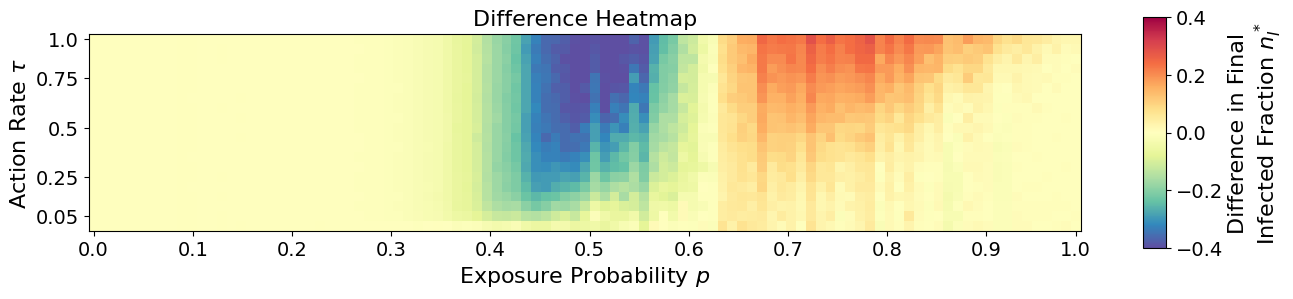

In [18]:
# Calculate the difference between the two heatmaps
heatmap_diff = ni_ana - ni_exp[:,:]/500 - static_diff

# Plot the difference heatmap
fig, ax = plt.subplots(figsize=(16, 6))
cmap = mpl.colormaps.get_cmap('Spectral_r')  # Use a diverging colormap for difference

im = ax.imshow(heatmap_diff, cmap=cmap, origin='lower',vmin=-0.4,vmax=0.4)
ax.set_title('Difference Heatmap', fontsize=16)
ax.set_yticks(np.array([0.05,0.25,0.5,0.75,0.95])*len(nu_ana))
ax.set_yticklabels(np.array([0.05,0.25,0.5,0.75,1.0]),fontsize=14)
ax.set_xticks(np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])*len(p_ana))
ax.set_xticklabels(np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]),fontsize=14)

# Include a colorbar for the difference heatmap
cbar = fig.colorbar(im,
                    ax=ax,
                    orientation='vertical',
                    shrink=0.5,
                    aspect=10,  
                    label='Difference in Final\nInfected Fraction $n_{I}^*$')
cbar.ax.yaxis.label.set_size(16)
cbar.ax.tick_params(labelsize=14)

# Add labels
ax.set_xlabel(r'Exposure Probability $p$', fontsize=16)
ax.set_ylabel('Action Rate $\\tau$', fontsize=16)

#plt.savefig('../img/Ch4_Difference_subs.png', dpi=500, bbox_inches='tight')
plt.show()

### Differences again for $q=0.2$

In [19]:
fp_exp = "./exp13.pkl"
df_exp = pd.read_pickle(fp_exp)

# change column header 'f' to 'nu'
df_exp.rename(columns={'f':'nu'}, inplace=True)
# round all entries in the columns 'p' and 'q' to 2 decimal places
df_exp['p'] = df_exp['p'].round(2)
df_exp['nu'] = df_exp['nu'].round(2)

display(df_exp)

x_param = 'p'
y_param = 'nu'
fix_param = {'q':0.2,'T':12,'n':0.45}
val_param = 'Ni_mean'

p_exp,nu_exp,ni_exp = cc.heatmap_fromDF(df_exp,
                                          fix_param,
                                          x_param,
                                          y_param,
                                          val_param,
                                          vmax=None,
                                          show=False,
                                          value=False,
                                          save=False,
                                          figsize=(22,16),
                                          )

fp_ana = "./ana13.pkl"
df_ana = pd.read_pickle(fp_ana)

# change column header 'f' to 'nu'
df_ana.rename(columns={'f':'nu'}, inplace=True)
# round all entries in the columns 'p' and 'q' to 2 decimal places
df_ana['p'] = df_ana['p'].round(2)
df_ana['nu'] = df_ana['nu'].round(2)

# fill missing data points
df_ana.loc[(df_ana['p'] > 0.85), 'ni'] = 1.0

display(df_ana)

x_param = 'p'
y_param = 'nu'
fix_param = {'q':0.2,'T':12,'n':0.45}
val_param = 'ni'

p_ana,nu_ana,ni_ana = cc.heatmap_fromDF(df_ana,
                                          fix_param,
                                          x_param,
                                          y_param,
                                          val_param,
                                          vmax=None,
                                          show=False,
                                          value=False,
                                          save=False,
                                          figsize=(22,16),
                                          )

,n,T,nu,p,r,q,ns_mean,ns_std,s_mean,s_std,<s>_mean,<s>_std,S_mean,S_std,runtime_mean,runtime_std,Ni_mean,Ni_std,num_samples
0,0.45,12.0,0.05,0.00,1.0,0.2,1.000000,0.000000,500.000000,0.000000,NaN,NaN,500.000000,0.000000,166.470588,29.987743,0.0,0.0,17
1,0.45,12.0,0.05,0.01,1.0,0.2,1.058824,0.242536,485.294118,60.633906,352.139177,NaN,499.941176,0.242536,165.882353,35.717437,0.0,0.0,17
2,0.45,12.0,0.05,0.02,1.0,0.2,1.000000,0.000000,500.000000,0.000000,NaN,NaN,500.000000,0.000000,171.764706,42.165640,0.0,0.0,17
3,0.45,12.0,0.05,0.03,1.0,0.2,1.000000,0.000000,500.000000,0.000000,NaN,NaN,500.000000,0.000000,158.235294,31.471275,0.0,0.0,17
4,0.45,12.0,0.05,0.04,1.0,0.2,1.058824,0.242536,485.294118,60.633906,352.139177,NaN,499.941176,0.242536,164.705882,25.029394,0.0,0.0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,0.45,12.0,1.00,0.96,1.0,0.2,1.000000,0.000000,500.000000,0.000000,NaN,NaN,500.000000,0.000000,20.000000,0.000000,500.0,0.0,16
2016,0.45,12.0,1.00,0.97,1.0,0.2,1.062500,0.250000,484.375000,62.500000,352.139177,NaN,499.937500,0.250000,20.000000,0.000000,500.0,0.0,16
2017,0.45,12.0,1.00,0.98,1.0,0.2,1.000000,0.000000,500.000000,0.000000,NaN,NaN,500.000000,0.000000,20.000000,0.000000,500.0,0.0,16
2018,0.45,12.0,1.00,0.99,1.0,0.2,1.062500,0.250000,484.375000,62.500000,352.139177,NaN,499.937500,0.250000,19.375000,2.500000,500.0,0.0,16


,n,beta,T,nu,p,q,ni,runtime
0,0.45,0.02,12,0.05,0.0,0.2,-3.609198e-11,1000
1,0.45,0.02,12,0.10,0.0,0.2,-3.388830e-13,1000
2,0.45,0.02,12,0.15,0.0,0.2,-6.264903e-14,1000
3,0.45,0.02,12,0.20,0.0,0.2,-2.552849e-14,1000
4,0.45,0.02,12,0.25,0.0,0.2,-2.030898e-14,1000
...,...,...,...,...,...,...,...,...
2015,0.45,0.02,12,0.80,1.0,0.2,1.000000e+00,1000
2016,0.45,0.02,12,0.85,1.0,0.2,1.000000e+00,1000
2017,0.45,0.02,12,0.90,1.0,0.2,1.000000e+00,1000
2018,0.45,0.02,12,0.95,1.0,0.2,1.000000e+00,1000


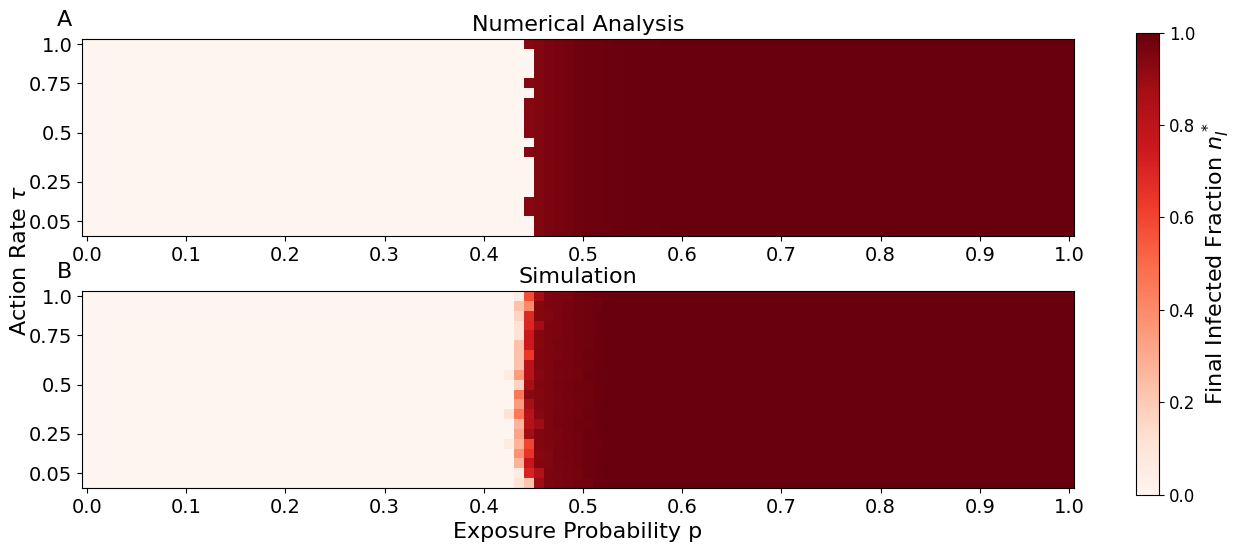

In [20]:
import matplotlib as mpl

# take the data from the two plots above and plot them together in two subplots, make sure that each cell is square
fig, ax = plt.subplots(2, 1, figsize=(16, 6), sharey=True)
cmap = mpl.colormaps.get_cmap('Reds')  # viridis is the default colormap for imshow
# plot the analytical data
im = ax[0].imshow(ni_ana, cmap=cmap, origin='lower')
ax[0].set_title('Numerical Analysis', fontsize=16)
ax[0].set_yticks(np.array([0.05, 0.25, 0.5, 0.75, 0.95]) * len(nu_ana))
ax[0].set_yticklabels(np.array([0.05, 0.25, 0.5, 0.75, 1.0]), fontsize=14)
ax[0].set_xticks(np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]) * len(p_ana))
ax[0].set_xticklabels(np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), fontsize=14)
ax[0].text(-0.01, 1.15, 'A', transform=ax[0].transAxes, fontsize=16, va='top', ha='right')

# plot the experimental data
im = ax[1].imshow(ni_exp / 500, cmap=cmap, origin='lower')
ax[1].set_xlabel('Exposure Probability p', fontsize=16)
ax[1].set_title('Simulation', fontsize=16)
ax[1].set_yticks(np.array([0.05, 0.25, 0.5, 0.75, 0.95]) * len(nu_exp))
ax[1].set_yticklabels(np.array([0.05, 0.25, 0.5, 0.75, 1.0]), fontsize=14)
ax[1].set_xticks(np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]) * len(p_ana))
ax[1].set_xticklabels(np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), fontsize=14)
ax[1].text(-0.01, 1.15, 'B', transform=ax[1].transAxes, fontsize=16, va='top', ha='right')

# include one colorbar for both plots at the right side
cbar = fig.colorbar(im, ax=ax, orientation='vertical', shrink=1, label='Final Infected Fraction $n_{I}^*$')
cbar.ax.yaxis.label.set_size(16)
cbar.ax.tick_params(labelsize=12)

# add a common y-label
fig.text(0.08, 0.5, 'Action Rate $\\tau$', va='center', rotation='vertical', fontsize=16)

#plt.savefig('../img/Ch4_Difference.png', dpi=500, bbox_inches='tight')
plt.show()


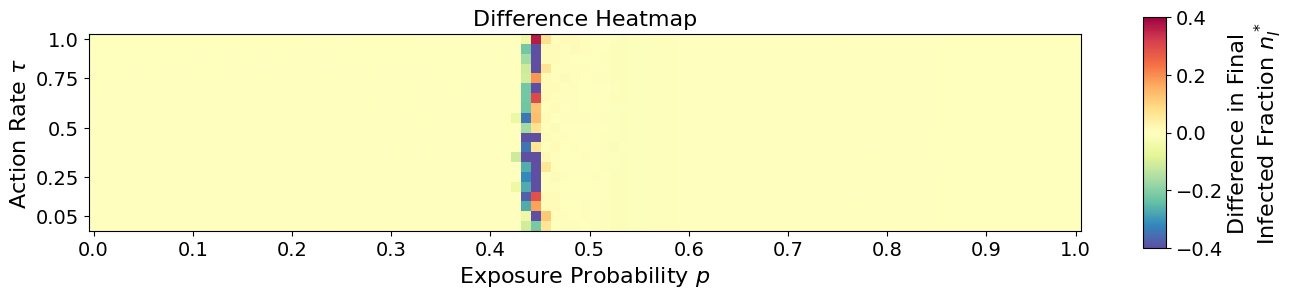

In [21]:
# Calculate the difference between the two heatmaps
heatmap_diff = ni_ana - ni_exp[:,:]/500

# Plot the difference heatmap
fig, ax = plt.subplots(figsize=(16, 6))
cmap = mpl.colormaps.get_cmap('Spectral_r')  # Use a diverging colormap for difference

im = ax.imshow(heatmap_diff, cmap=cmap, origin='lower',vmin=-0.4,vmax=0.4)
ax.set_title('Difference Heatmap', fontsize=16)
ax.set_yticks(np.array([0.05,0.25,0.5,0.75,0.95])*len(nu_ana))
ax.set_yticklabels(np.array([0.05,0.25,0.5,0.75,1.0]),fontsize=14)
ax.set_xticks(np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])*len(p_ana))
ax.set_xticklabels(np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]),fontsize=14)

# Include a colorbar for the difference heatmap
cbar = fig.colorbar(im,
                    ax=ax,
                    orientation='vertical',
                    shrink=0.5,
                    aspect=10,  
                    label='Difference in Final\nInfected Fraction $n_{I}^*$')
cbar.ax.yaxis.label.set_size(16)
cbar.ax.tick_params(labelsize=14)

# Add labels
ax.set_xlabel(r'Exposure Probability $p$', fontsize=16)
ax.set_ylabel('Action Rate $\\tau$', fontsize=16)

#plt.savefig('../img/Ch4_Difference_subs.png', dpi=500, bbox_inches='tight')
plt.show()

### $P_S^I$ and $P_I^S$

\begin{align*}
    p_{S \rightarrow I} &= \sum_{k=1}^T \left[ {T \choose k} \left( p P_S^I \right)^k \left(1 - p P_S^I \right)^{T-k} \int_{d=d^*}^{\infty} f^{k*} \left( d \right) \,dd \right] \enspace ,\\
    p_{I \rightarrow S} &= \sum_{k=1}^T \left[ {T \choose k} \left( p P_I^I \right)^k \left(1 - p P_I^I \right)^{T-k} \int_{0}^{d<d^*} f^{k*} \left( d \right) \,dd \right] + \left(1 - p P_I^I \right)^T \enspace ,
\end{align*}

with

\begin{align*}
    P_I^S &= \frac{m_{SI}}{2 m_I + m_{SI}} \enspace , \\
    P_S^I &= \frac{m_{SI}}{2 m_S + m_{SI}} \enspace , \\
    P_I^I &= \frac{2 m_I}{2 m_I + m_{SI}} \enspace , \\
    m_{SI} &= m - m_I - m_S \enspace , 
\end{align*}

In [22]:
# -> 2 seconds

# define some parameters
N = 500
beta = 0.02
M = beta * N*(N-1)/2
m = M/N

# compute psi and pis for all possible values of mI and mS
res = 1000           # resoultion of the heatmap
PSI_series = np.full((res+1,res+1),np.nan)
PIS_series = np.full((res+1,res+1),np.nan)

mI_series = np.linspace(0, m, res)
mI_series[0] = 0.0001
for i, mI in enumerate(mI_series):
    mS_series = np.linspace(0, m-mI, int(res*(1-mI/m)))
    try: 
        mS_series[0] = 0.0001
    except:
        continue
    for j, mS in enumerate(mS_series):
        #print(f'mS: {mS}')
        PSI = cde.PSI(m,mS,mI)
        PIS = cde.PIS(m,mS,mI)
        PSI_series[j,i] = PSI
        PIS_series[j,i] = PIS

### $p_{S \rightarrow I}$ and $p_{I \rightarrow S} $,

In [23]:
# -> 3 minutes

# define some parameters
N = 500
beta = 0.02
M = beta * N*(N-1)/2
m = M/N
print(f'm: {m}')
T = 12
print(f'T: {T}')
p = 0.5
print(f'p: {p}')
ds = 3
print(f'ds: {ds}')
Xp = np.array([1])
Yp = np.array([1])
print(f'Xp: {Xp}')
q = 0.5
print(f'q: {q}')


# compute psi and pis for all possible values of mI and mS

res = 1000           # resoultion of the heatmap
psi_series = np.full((res+1,res+1),np.nan)
pis_series = np.full((res+1,res+1),np.nan)

mI_series = np.linspace(0, m, res)
for i, mI in enumerate(mI_series):
    mS_series = np.linspace(0, m-mI, int(res*(1-mI/m)))
    for j, mS in enumerate(mS_series):
        psi = cde.psi(m, mI, mS, T, p, ds, Xp, Yp)
        pis = cde.pis(m, mI, mS, T, p, ds, Xp, Yp)
        psi_series[j,i] = psi
        pis_series[j,i] = pis

# compute trajectories using an Erdős-Rényi network
S = 700
q = 0
f = 1/20
Xd = [ds]
Yd = [1]
n_series = np.arange(0.01,0.5,0.05,dtype=float)
R = 30      # sample size trajectories

traj_series = np.full((len(n_series),R,3,S),np.nan)

for i in range(len(n_series)):
    for _ in range(R):
        n = n_series[i]
        ni_values, mi_values, ms_values = cde.single_run(N,beta,n,T,p,q,Xd,Yd,Xp,Yp,f,S)
        traj_series[i,_,0,:] = ni_values
        traj_series[i,_,1,:] = mi_values
        traj_series[i,_,2,:] = ms_values

mi_traj_mean = np.mean(traj_series[:,:,1,:],axis=1)
ms_traj_mean = np.mean(traj_series[:,:,2,:],axis=1)

m: 4.99
T: 12
p: 0.5
ds: 3
Xp: [1]
q: 0.5


/home/lukas/Documents/Science/Thesis/complex-contagion/results/./../cde.py:161: RuntimeWarning: divide by zero encountered in scalar divide
  return ((2*mi))/(2*mi + m-mi-ms)
/home/lukas/Documents/Science/Thesis/complex-contagion/results/./../cde.py:126: RuntimeWarning: invalid value encountered in scalar add
  s += binomial(T,k) * (p*Pii)**k * (1-p*Pii)**(T-k) * num_integrate(X_conv,Y_conv,0,ds-0.01)
/home/lukas/Documents/Science/Thesis/complex-contagion/results/./../cde.py:126: RuntimeWarning: invalid value encountered in scalar multiply
  s += binomial(T,k) * (p*Pii)**k * (1-p*Pii)**(T-k) * num_integrate(X_conv,Y_conv,0,ds-0.01)
/home/lukas/Documents/Science/Thesis/complex-contagion/results/./../cde.py:150: RuntimeWarning: divide by zero encountered in scalar divide
  return (m-mi-ms)/(2*mi + m-mi-ms)
/home/lukas/Documents/Science/Thesis/complex-contagion/results/./../cde.py:57: RuntimeWarning: invalid value encountered in scalar multiply
  dmidt = (1-q) * nu * (psi(m,mi,ms,T,p,ds,X

 lsoda--  at t (=r1), too much accuracy requested    
       for precision of machine..  see tolsf (=r2)   
      in above,  r1 =  0.1001430615165D+01   r2 =                  NaN


### Plot

/tmp/ipykernel_9324/2677183823.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


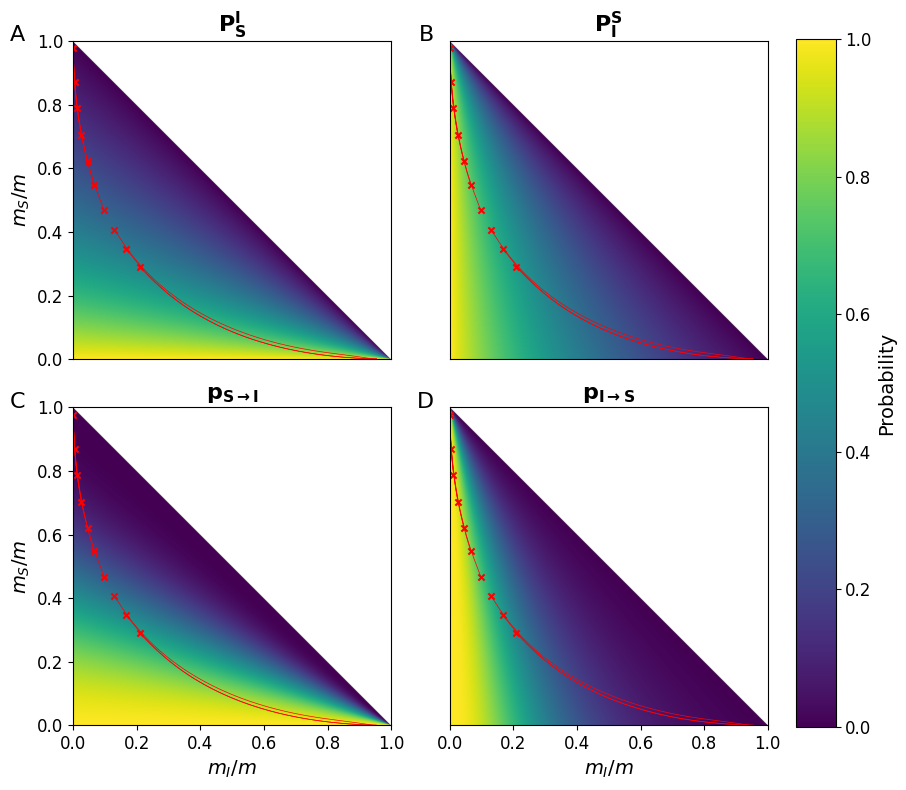

In [25]:
# plot

fig, ax = plt.subplots(2, 2, figsize=(8, 8))

# Plot PSI_series heatmap
im00 = ax[0, 0].imshow(PSI_series,
                      origin='lower',
                      extent=[0, 1, 0, 1],
                      cmap='viridis')
ax[0, 0].set_title(r'$\mathbf{P_S^I}$', fontsize=16)
ax[0, 0].set_ylabel(r'$m_S/m$', fontsize=14)
for i in range(len(n_series)):
    ax[0, 0].plot(mi_traj_mean[i, :] / m, ms_traj_mean[i, :] / m, color='red', linewidth=0.5)
    ax[0, 0].scatter(mi_traj_mean[i, 0] / m, ms_traj_mean[i, 0] / m, color='red', marker='x', s=20)
ax[0, 0].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=12)
ax[0, 0].set_xticks([])
ax[0, 0].text(-0.15, 1.05, 'A', transform=ax[0, 0].transAxes, fontsize=16, va='top', ha='right')

# Plot PIS_series heatmap
im01 = ax[0, 1].imshow(PIS_series,
                      origin='lower',
                      extent=[0, 1, 0, 1],
                      cmap='viridis')
ax[0, 1].set_title(r'$\mathbf{P_I^S}$', fontsize=16)
for i in range(len(n_series)):
    ax[0, 1].plot(mi_traj_mean[i, :] / m, ms_traj_mean[i, :] / m, color='red', linewidth=0.5)
    ax[0, 1].scatter(mi_traj_mean[i, 0] / m, ms_traj_mean[i, 0] / m, color='red', marker='x', s=20)
ax[0, 1].set_yticks([])
ax[0, 1].set_xticks([])
ax[0, 1].text(-0.05, 1.05, 'B', transform=ax[0, 1].transAxes, fontsize=16, va='top', ha='right')

# Plot psi_series heatmap
im10 = ax[1, 0].imshow(psi_series,
                      extent=[0, 1, 0, 1],
                      origin='lower',
                      cmap='viridis')
ax[1, 0].set_title(r'$\mathbf{p_{S \rightarrow I}}$', fontsize=16)
ax[1, 0].set_xlabel(r'$m_I/m$', fontsize=14)
ax[1, 0].set_ylabel(r'$m_S/m$', fontsize=14)
for i in range(len(n_series)):
    ax[1, 0].plot(mi_traj_mean[i, :] / m, ms_traj_mean[i, :] / m, color='red', linewidth=0.5)
    ax[1, 0].scatter(mi_traj_mean[i, 0] / m, ms_traj_mean[i, 0] / m, color='red', marker='x', s=20)
ax[1, 0].plot([0, 0], [0, 0], color='red', label=f'anal. trajectories for\n' + r'$n_0$ = [0.01, ..., 0.5]')
#ax[1, 0].legend(fontsize=12)
ax[1, 0].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=12)
ax[1, 0].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=12)
ax[1, 0].text(-0.15, 1.05, 'C', transform=ax[1, 0].transAxes, fontsize=16, va='top', ha='right')

# Plot pis_series heatmap
im11 = ax[1, 1].imshow(pis_series,
                      extent=[0, 1, 0, 1],
                      origin='lower',
                      cmap='viridis')
ax[1, 1].set_title(r'$\mathbf{p_{I \rightarrow S}}$', fontsize=16)
ax[1, 1].set_xlabel(r'$m_I/m$', fontsize=14)
for i in range(len(n_series)):
    ax[1, 1].plot(mi_traj_mean[i, :] / m, ms_traj_mean[i, :] / m, color='red', linewidth=0.5)
    ax[1, 1].scatter(mi_traj_mean[i, 0] / m, ms_traj_mean[i, 0] / m, color='red', marker='x', s=20)
ax[1, 1].plot([0, 0], [0, 0], color='red', label=f'anal. trajectories for\n' + r'$n_0$ = [0.01, ..., 0.5]')
#ax[1, 1].legend(fontsize=12)
ax[1, 1].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['0.0', '0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=12)
ax[1, 1].set_yticks([])
ax[1, 1].text(-0.05, 1.05, 'D', transform=ax[1, 1].transAxes, fontsize=16, va='top', ha='right')

# shared colorbar with custom labels
cbar_ax = fig.add_axes([1.0, 0.085, 0.05, 0.86])  # x, y, width, height
cbar = fig.colorbar(im00, cax=cbar_ax)
cbar.set_label('Probability', fontsize=14)
cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1])
cbar.set_ticklabels([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=12)

plt.tight_layout()
#plt.savefig('../img/Ch4_ApproxProb.png', dpi=500, bbox_inches='tight')
plt.show()

### Saddle-Point

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import pandas as pd
import matplotlib as mpl
import sys

sys.path.append('./..')
import cclib as cc
import cde

In [27]:
# -> 40 seconds

N = 500
beta = 0.02
T = 12
p = 0.6
Xd = [3]
Yd = [1]
Xp = np.array([1])
Yp = np.array([1])
tau = 1/20
S = 5000
n = 0.1
q = 0.6

m = beta * (N/2 - 1/2)

step=(0.1,0.05,0.05)
ni0=(n,n)

ni_values_0, mi_values_0, ms_values_0 = cde.hairline_data(N,
                                                          beta,
                                                          T,
                                                          p,
                                                          Xd,
                                                          Yd,
                                                          Xp,
                                                          Yp,
                                                          tau,
                                                          S,
                                                          q,
                                                          step,
                                                          ni0,
                                                          verbose=True,
                                                          )


m: 4.99

ni0_series: [0.1]
1 of 1	 mi0_series: [np.float64(0.0), np.float64(0.2495), np.float64(0.499), np.float64(0.7485), np.float64(0.998), np.float64(1.2475), np.float64(1.497), np.float64(1.7465), np.float64(1.996), np.float64(2.2455), np.float64(2.45)]
	1 of 11	 ms0_series: [np.float64(0.0), np.float64(0.2495), np.float64(0.499), np.float64(0.7485), np.float64(0.998), np.float64(1.2475), np.float64(1.497), np.float64(1.7465), np.float64(1.996), np.float64(2.2455), np.float64(2.495), np.float64(2.7445), np.float64(2.994), np.float64(3.2435), np.float64(3.493), np.float64(3.7425), np.float64(3.992), np.float64(4.2415), np.float64(4.491), np.float64(4.7405), np.float64(4.99)]
	2 of 11	 ms0_series: [np.float64(0.0), np.float64(0.2495), np.float64(0.499), np.float64(0.7485), np.float64(0.998), np.float64(1.2475), np.float64(1.497), np.float64(1.7465), np.float64(1.996), np.float64(2.2455), np.float64(2.495), np.float64(2.7445), np.float64(2.994), np.float64(3.2435), np.float64(3.493),

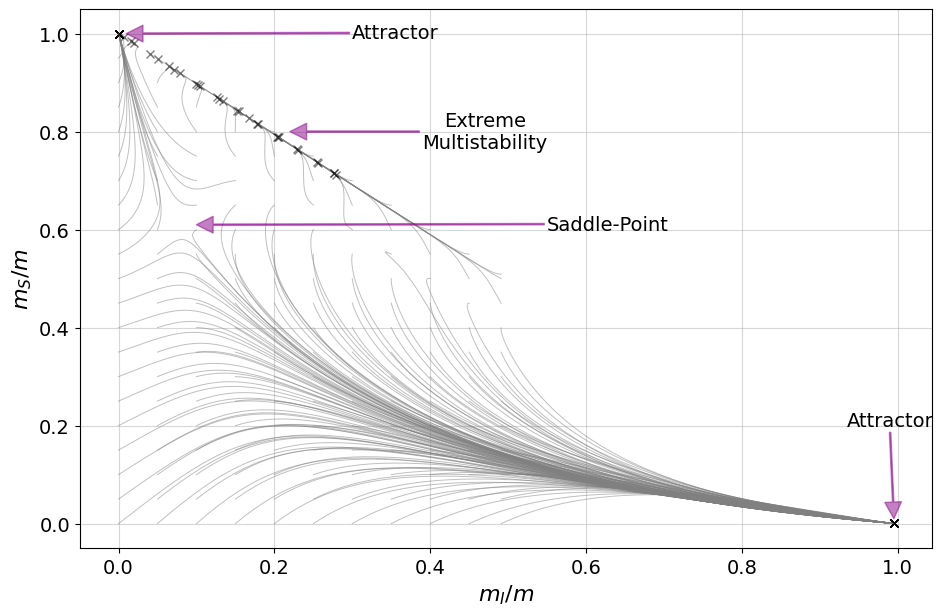

In [28]:
save_path = '../img/Ch4_Hairline.png'

X_values = mi_values_0/m
Y_values = ms_values_0/m
Z_values = ni_values_0

X_label = r'$m_I/m$'
Y_label = r'$m_S/m$'


ni0_R,mim0_R,msm0_R,S = X_values.shape

fig, ax = plt.subplots(figsize=(11,7))
cmap = mpl.colormaps.get_cmap('rainbow')  # viridis is the default colormap for imshow

#legend = 'Test'
#plt.plot([],[],linewidth=0,label=legend)

# - plot X and Y
for i in range(ni0_R):
    for j in range(mim0_R):
        for k in range(msm0_R):
            try:
                # hairline trajectory
                plt.plot(X_values[i,j,k],
                         Y_values[i,j,k],
                         color='grey',
                         linewidth=0.7,
                         alpha=0.5,
                         )
                # end point
                plt.plot(X_values[i,j,k,-1],
                         Y_values[i,j,k,-1],
                         marker='x',
                         color='black',
                         alpha=0.5,
                         )
            except:
                pass

# Add arrow - Saddle-Point
ax.annotate('Saddle-Point',
            xy=(0.1, 0.61),
            xytext=(0.55, 0.60),
            arrowprops=dict(facecolor='darkmagenta',
                            edgecolor='darkmagenta',
                            alpha=0.5,
                            width=1,
                            ),
            fontsize=14,
            color='black')
# Add arrow - Attractor
ax.annotate('Attractor',
            xy=(0.01, 1.0),
            xytext=(0.3, 0.99),
            arrowprops=dict(facecolor='darkmagenta',
                            edgecolor='darkmagenta',
                            alpha=0.5,
                            width=1,
                            ),
            fontsize=14,
            color='black')
# Add arrow - Attractor
ax.annotate('Attractor',
            xy=(0.995, 0.01),
            xytext=(0.99, 0.2),
            arrowprops=dict(facecolor='darkmagenta',
                            edgecolor='darkmagenta',
                            alpha=0.5,
                            width=1,
                            ),
            fontsize=14,
            color='black',
            ha='center')
# Add arrow - extreme Multistability
ax.annotate('Extreme\nMultistability',
            xy=(0.22, 0.8),
            xytext=(0.47, 0.8),
            arrowprops=dict(facecolor='darkmagenta',
                            edgecolor='darkmagenta',
                            alpha=0.5,
                            width=1,
                            ),
            fontsize=14,
            color='black',
            ha='center',
            va='center')

plt.xlabel(X_label,fontsize=16)
plt.ylabel(Y_label,fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(alpha=0.5)
#plt.legend(fontsize=16)

#plt.savefig(save_path,dpi=500)
plt.show()

## Dependence on N

In [29]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

import sys
sys.path.append('./..')
import cclib as cc

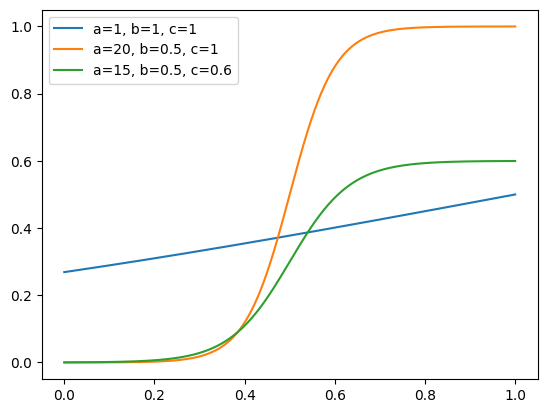

In [30]:
# fit functions

def fit_func(x,a,b):
    return a*x**b

def sigmoid(x,a,b,c):
    return c/(1+np.exp(-a*(x-b)))

X = np.linspace(0,1,1000)

a,b,c = 1,1,1
plt.plot(X,sigmoid(X,a,b,c),label=f'a={a}, b={b}, c={c}')
a,b,c = 20,0.5,1
plt.plot(X,sigmoid(X,a,b,c),label=f'a={a}, b={b}, c={c}')
a,b,c = 15,0.5,0.6
plt.plot(X,sigmoid(X,a,b,c),label=f'a={a}, b={b}, c={c}')

plt.legend()
plt.show()

In [31]:
fn = 'N-dep_mean.pkl'
df_N_old = pd.read_pickle(fn)

display(df_N_old)

,n,N,p,ni,runtime
0,0.01,100,0.00,0.000000e+00,1000
1,0.01,100,0.02,4.496113e-12,1000
2,0.01,100,0.04,5.799724e-06,1000
3,0.01,100,0.06,6.316430e-06,1000
4,0.01,100,0.08,-2.475074e-10,1000
...,...,...,...,...,...
17488,0.49,10000,0.92,9.997139e-01,1000
17489,0.49,10000,0.94,9.997147e-01,1000
17490,0.49,10000,0.96,9.997153e-01,1000
17491,0.49,10000,0.98,9.997158e-01,1000


In [32]:
fn_list = ['N-dep_mean_N100.pkl',
           'N-dep_mean_N300.pkl',
           'N-dep_mean_N500.pkl',
           'N-dep_mean_N800.pkl',
           ]
df_list = []
for fn in fn_list:
    print(f'Filename: {fn}')
    df = pd.read_pickle(fn)
    df_list.append(df)

df_N = pd.concat(df_list, ignore_index=True)

# add df_N_old values for column N = 1000,5000,10000
df_N_old_filter = df_N_old.loc[df_N_old['N'].isin([1000,5000,10000])]
df_N = pd.concat([df_N,df_N_old_filter],ignore_index=True)

display(df_N)

Filename: N-dep_mean_N100.pkl
Filename: N-dep_mean_N300.pkl
Filename: N-dep_mean_N500.pkl
Filename: N-dep_mean_N800.pkl


,n,N,p,ni,runtime,sample size
0,0.01,100,0.00,0.000006,1000,500.0
1,0.01,100,0.02,0.000006,1000,500.0
2,0.01,100,0.04,0.000006,1000,500.0
3,0.01,100,0.06,0.000006,1000,500.0
4,0.01,100,0.08,0.000008,1000,500.0
...,...,...,...,...,...,...
17488,0.49,10000,0.92,0.999714,1000,NaN
17489,0.49,10000,0.94,0.999715,1000,NaN
17490,0.49,10000,0.96,0.999715,1000,NaN
17491,0.49,10000,0.98,0.999716,1000,NaN


In [33]:
# - plot with p as x-axis and ni as y-axis

fix_param = {}
x_param = 'p'
y_param = 'N'
p_list_N, N_list, crit_list_N = cc.heatmap_criticalmass(df_N,
                                                    fix_param,
                                                    x_param,
                                                    y_param,
                                                    cm_param='n',
                                                    target_column='ni',
                                                    I_threshold=0.6,
                                                    show=False,
                                                    nmax=1,
                                                    )

# replace value -1 with NaN in crit_list_N
crit_list_N = np.where(crit_list_N == -1, np.nan, crit_list_N)

fix_param = {'n': 0.49}
p_list_N, N_list, val_list_N = cc.heatmap_fromDF(df_N,
                                             fix_param,
                                             x_param,
                                             y_param,
                                             val_param='ni',
                                             show=False,
                                             )


p_list: [0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]
N_list: [  100   300   500   800  1000  5000 10000]


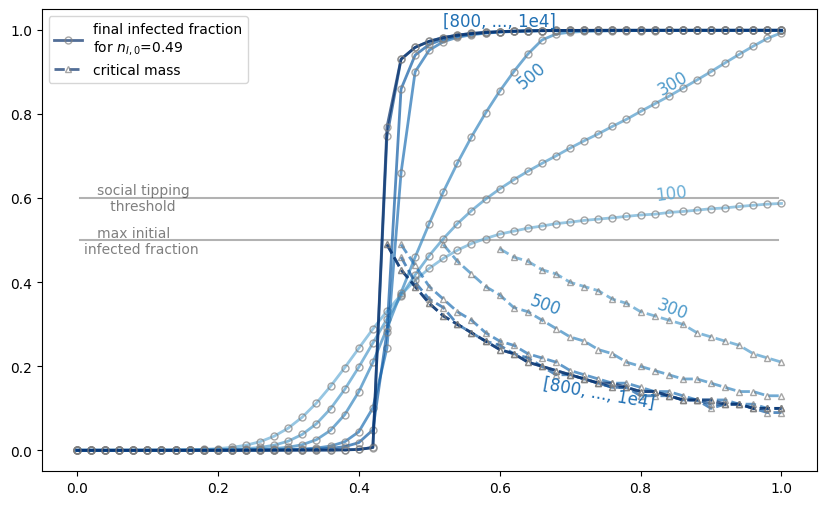

In [34]:
def create_plot1_mean(ax=None,verbose=False):
    
    # use a blue spectrum as the colors
    color = plt.cm.Blues(np.linspace(0.5, 1.0, len(N_list)))

    if verbose:
        print(f"p_list: {p_list_N}")
        print(f"N_list: {N_list}")
                
    if ax is None:
        fig,ax = plt.subplots(figsize=(10, 6))

    lw = 2.0
    ms = 5.0
    #ax.plot(p_list_q, val_list_q[0], color=color[0])
    for i in range(0,len(N_list)):
        # stable basin
        # >> datapoints
        ax.errorbar(p_list_N,
                    val_list_N[i],
                    marker='o',
                    markersize=ms,
                    linestyle='-',
                    linewidth=lw,
                    color=color[i],
                    markerfacecolor='none',
                    markeredgecolor='grey',
                    alpha=0.7)
        
        # unstable basin
        # >> datapoints
        ax.errorbar(p_list_N,
                    crit_list_N[i],
                    marker='^',
                    markersize=ms,
                    linestyle='--',
                    linewidth=lw,
                    color=color[i],
                    markerfacecolor='none',
                    markeredgecolor='grey',
                    alpha=0.7)
        mask_us = ~np.isnan(crit_list_N[i])

    # add a horizontal line at y=0.5
    ax.axhline(y=0.5, xmin=0.05, xmax=0.95, color='k', linestyle='-', alpha=0.3)
    ax.annotate('\n   max initial\ninfected fraction', xy=(0.01, 0.5), xytext=(0, 5.0),
                textcoords='offset points', color='k', fontsize=10, va='center', alpha=0.5)
    ax.axhline(y=0.6, xmin=0.05, xmax=0.95, color='k', linestyle='-', alpha=0.3)
    ax.annotate('   social tipping\n      threshold', xy=(0.01, 0.6), xytext=(0, 0),
                textcoords='offset points', color='k', fontsize=10, va='center', alpha=0.5)
    # add legend for solid and dashed lines
    ax.plot([], [], 
                marker='o',
                markersize=ms,
                linestyle='-',
                linewidth=lw,
                markerfacecolor='none',
                markeredgecolor='grey',
                color=color[-1],
                alpha = 0.7,
                label='final infected fraction\nfor'+r' $n_{I,0}$=0.49',
                )
    ax.plot([], [], 
                marker='^',
                markersize=ms,
                linestyle='--',
                linewidth=lw,
                markerfacecolor='none',
                markeredgecolor='grey',
                color=color[-1],
                alpha = 0.7,
                label='critical mass',
                )

    # add annotations
    ax.annotate(f'{N_list[0]}', xy=(p_list_N[-10], val_list_N[0][-10]), xytext=(0, 15),
                    textcoords='offset points', color=color[0], fontsize=12, va='center', rotation=7)
    ax.annotate(f'{N_list[1]}', xy=(p_list_N[-10], val_list_N[1][-10]), xytext=(0, 15),
                    textcoords='offset points', color=color[1], fontsize=12, va='center', rotation=30)
    ax.annotate(f'{N_list[2]}', xy=(p_list_N[-19], val_list_N[2][-19]), xytext=(-10, -15),
                    textcoords='offset points', color=color[2], fontsize=12, va='center', rotation=40)
    ax.annotate(f'[800, ..., 1e4]', xy=(p_list_N[-25], val_list_N[3][-25]), xytext=(0, 15),
                    textcoords='offset points', color=color[3], fontsize=12, va='center', rotation=0)

    ax.annotate(f'{N_list[1]}', xy=(p_list_N[-10], crit_list_N[1][-10]), xytext=(0, 5),
                    textcoords='offset points', color=color[1], fontsize=12, va='center', rotation=-20)
    ax.annotate(f'{N_list[2]}', xy=(p_list_N[-19], crit_list_N[2][-19]), xytext=(0, 5),
                    textcoords='offset points', color=color[2], fontsize=12, va='center', rotation=-20)
    ax.annotate(f'[800, ..., 1e4]', xy=(p_list_N[-18], crit_list_N[3][-18]), xytext=(0, -25),
                    textcoords='offset points', color=color[3], fontsize=12, va='center', rotation=-10)

    # add labels and title
    if ax is None:
        ax.xlabel(r'Exposure Probability $p$', fontsize=14)
        ax.ylabel(r'Infected Fraction $n_{I}$', fontsize=14)
        ax.title('Dependence of Infected Fraction on Rewiring Probability $q$', fontsize=16)
    ax.legend()
    # create plot
    if ax is None:
        plt.savefig('../img/Ch4_N-dep.png')
        plt.show()

create_plot1_mean(verbose=True)

## Dependence on $\beta$

In [35]:
fn = 'beta-dep_mean.pkl'
df_beta = pd.read_pickle(fn)

# rename column 'ni:mean' to 'ni_mean'
df_beta.rename(columns={'ni:mean':'ni_mean'}, inplace=True)

display(df_beta)

,n,beta,p,ni,runtime,sample size
0,0.01,0.01,0.00,0.000006,1000,500
1,0.01,0.01,0.02,0.000006,1000,500
2,0.01,0.01,0.04,0.000006,1000,500
3,0.01,0.01,0.06,0.000006,1000,500
4,0.01,0.01,0.08,0.000007,1000,500
...,...,...,...,...,...,...
17488,0.49,1.00,0.92,0.999714,1000,500
17489,0.49,1.00,0.94,0.999715,1000,500
17490,0.49,1.00,0.96,0.999715,1000,500
17491,0.49,1.00,0.98,0.999716,1000,500


In [36]:
fix_param = {}
x_param = 'p'
y_param = 'beta'
p_list_beta, beta_list, crit_list_beta = cc.heatmap_criticalmass(df_beta,
                                                    fix_param,
                                                    x_param,
                                                    y_param,
                                                    cm_param='n',
                                                    target_column='ni',
                                                    I_threshold=0.6,
                                                    show=False,
                                                    nmax=1,
                                                    )
# replace vluae -1 with NaN in crit_list_beta
crit_list_beta = np.where(crit_list_beta == -1, np.nan, crit_list_beta)

fix_param = {'n': 0.49}
p_list_beta, beta_list, val_list_beta = cc.heatmap_fromDF(df_beta,
                                             fix_param,
                                             x_param,
                                             y_param,
                                             val_param='ni',
                                             show=False,
                                             )
print(f"p_list: {p_list_beta}")
print(f"beta_list: {beta_list}")


p_list: [0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]
beta_list: [0.01 0.02 0.05 0.1  0.2  0.5  1.  ]


p_list: [0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]
beta_list: [0.01 0.02 0.05 0.1  0.2  0.5  1.  ]


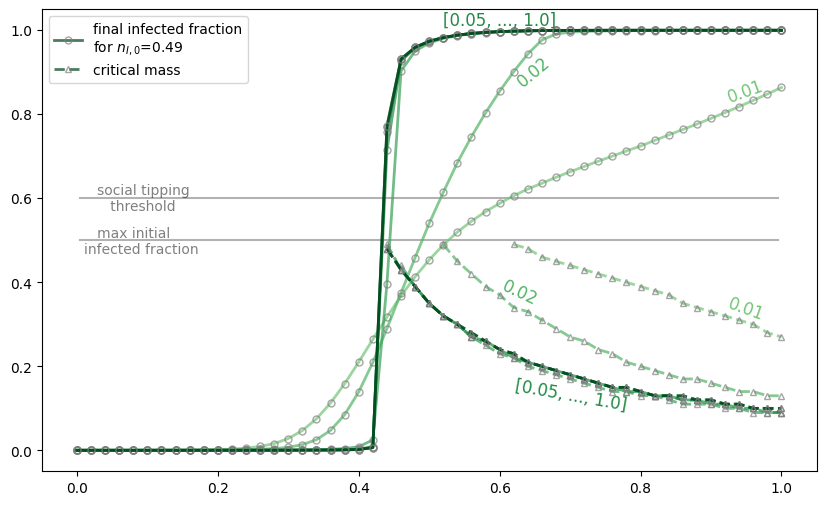

In [37]:
def create_plot2_mean(ax=None,verbose=False):
    
    # use a blue spectrum as the colors
    color = plt.cm.Greens(np.linspace(0.5, 1.0, len(beta_list)))

    if verbose:
        print(f"p_list: {p_list_beta}")
        print(f"beta_list: {beta_list}")
                
    if ax is None:
        fig,ax = plt.subplots(figsize=(10, 6))

    lw = 2.0
    ms = 5.0
    #ax.plot(p_list_q, val_list_q[0], color=color[0])
    for i in range(0,len(beta_list)):
        # stable basin
        # >> datapoints
        ax.errorbar(p_list_beta,
                    val_list_beta[i],
                    marker='o',
                    markersize=ms,
                    linestyle='-',
                    linewidth=lw,
                    color=color[i],
                    markerfacecolor='none',
                    markeredgecolor='grey',
                    alpha=0.7)
        
        # unstable basin
        # >> datapoints
        ax.errorbar(p_list_beta,
                    crit_list_beta[i],
                    marker='^',
                    markersize=ms,
                    linestyle='--',
                    linewidth=lw,
                    color=color[i],
                    markerfacecolor='none',
                    markeredgecolor='grey',
                    alpha=0.7)
        mask_us = ~np.isnan(crit_list_beta[i])

    # add a horizontal line at y=0.5
    ax.axhline(y=0.5, xmin=0.05, xmax=0.95, color='k', linestyle='-', alpha=0.3)
    ax.annotate('\n   max initial\ninfected fraction', xy=(0.01, 0.5), xytext=(0, 5.0),
                textcoords='offset points', color='k', fontsize=10, va='center', alpha=0.5)
    ax.axhline(y=0.6, xmin=0.05, xmax=0.95, color='k', linestyle='-', alpha=0.3)
    ax.annotate('   social tipping\n      threshold', xy=(0.01, 0.6), xytext=(0, 0),
                textcoords='offset points', color='k', fontsize=10, va='center', alpha=0.5)
    # add legend for solid and dashed lines
    ax.plot([], [], 
                marker='o',
                markersize=ms,
                linestyle='-',
                linewidth=lw,
                markerfacecolor='none',
                markeredgecolor='grey',
                color=color[-1],
                alpha = 0.7,
                label='final infected fraction\nfor'+r' $n_{I,0}$=0.49',
                )
    ax.plot([], [], 
                marker='^',
                markersize=ms,
                linestyle='--',
                linewidth=lw,
                markerfacecolor='none',
                markeredgecolor='grey',
                color=color[-1],
                alpha = 0.7,
                label='critical mass',
                )

    # add annotations
    ax.annotate(f'{beta_list[0]}', xy=(p_list_beta[-5], val_list_beta[0][-5]), xytext=(0, 15),
                    textcoords='offset points', color=color[0], fontsize=12, va='center', rotation=20)
    ax.annotate(f'{beta_list[1]}', xy=(p_list_beta[-20], val_list_beta[1][-20]), xytext=(0, 0),
                    textcoords='offset points', color=color[1], fontsize=12, va='center', rotation=40)
    ax.annotate(f'[0.05, ..., 1.0]', xy=(p_list_beta[-25], val_list_beta[-4][-25]), xytext=(0, 13),
                    textcoords='offset points', color=color[-4], fontsize=12, va='center', rotation=-00)

    ax.annotate(f'{beta_list[0]}', xy=(p_list_beta[-5], crit_list_beta[0][-5]), xytext=(0, 5),
                    textcoords='offset points', color=color[0], fontsize=12, va='center', rotation=-20)
    ax.annotate(f'{beta_list[1]}', xy=(p_list_beta[-21], crit_list_beta[1][-21]), xytext=(0, 2),
                    textcoords='offset points', color=color[1], fontsize=12, va='center', rotation=-25)
    ax.annotate(f'[0.05, ..., 1.0]', xy=(p_list_beta[-20], crit_list_beta[-4][-20]), xytext=(0, -27),
                    textcoords='offset points', color=color[-4], fontsize=12, va='center', rotation=-10)

    # add labels and title
    if ax is None:
        ax.xlabel(r'Exposure Probability $p$', fontsize=14)
        ax.ylabel(r'Infected Fraction $n_{I}$', fontsize=14)
        ax.title('Dependence of Infected Fraction on Rewiring Probability $q$', fontsize=16)
    ax.legend()
    # create plot
    if ax is None:
        plt.savefig('../img/Ch4_beta-dep.png')
        plt.show()

create_plot2_mean(verbose=True)

## Dependence on q

In [38]:
fn = 'q-dep_mean.pkl'
df_q = pd.read_pickle(fn)
q_interval = 49*51
q_list = np.array([0.0,0.5,0.75,0.8,0.85,0.9,0.95])

# add column 'q' to df_q, fill in the i'th value of q_list for each i'th q_interval in df_q
q_col = [q_interval*[q] for q in q_list]
q_col = np.array(q_col).flatten()
df_q['q'] = q_col

# remove certain values
rm = [0.85]
df_q = df_q[~df_q['q'].isin(rm)]
q_list = np.delete(q_list,np.where(q_list == rm))

display(df_q)

,n,N,p,ni,runtime,sample size,q
0,0.01,500,0.00,-7.913320e-12,1000,500,0.00
1,0.01,500,0.02,-8.281805e-12,1000,500,0.00
2,0.01,500,0.04,-9.335778e-12,1000,500,0.00
3,0.01,500,0.06,-9.123600e-12,1000,500,0.00
4,0.01,500,0.08,-8.103099e-12,1000,500,0.00
...,...,...,...,...,...,...,...
17488,0.49,500,0.92,6.348010e-01,1000,500,0.95
17489,0.49,500,0.94,6.400876e-01,1000,500,0.95
17490,0.49,500,0.96,6.448494e-01,1000,500,0.95
17491,0.49,500,0.98,6.500867e-01,1000,500,0.95


In [39]:
fix_param = {}
x_param = 'p'
y_param = 'q'
p_list_q, _, crit_list_q = cc.heatmap_criticalmass(df_q,
                                                    fix_param,
                                                    x_param,
                                                    y_param,
                                                    cm_param='n',
                                                    target_column='ni',
                                                    I_threshold=0.6,
                                                    show=False,
                                                    nmax=1,
                                                    )
# replace vluae -1 with NaN in crit_list
crit_list_q = np.where(crit_list_q == -1, np.nan, crit_list_q)

print(_)
fix_param = {'n': 0.49}
p_list_q, _, val_list_q = cc.heatmap_fromDF(df_q,
                                             fix_param,
                                             x_param,
                                             y_param,
                                             val_param='ni',
                                             show=False,
                                             )

print(f"p_list: {p_list_q}")
print(f"q_list: {q_list}")


[0.   0.5  0.75 0.8  0.9  0.95]
p_list: [0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]
q_list: [0.   0.5  0.75 0.8  0.9  0.95]


p_list: [0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]
q_list: [0.   0.5  0.75 0.8  0.9  0.95]


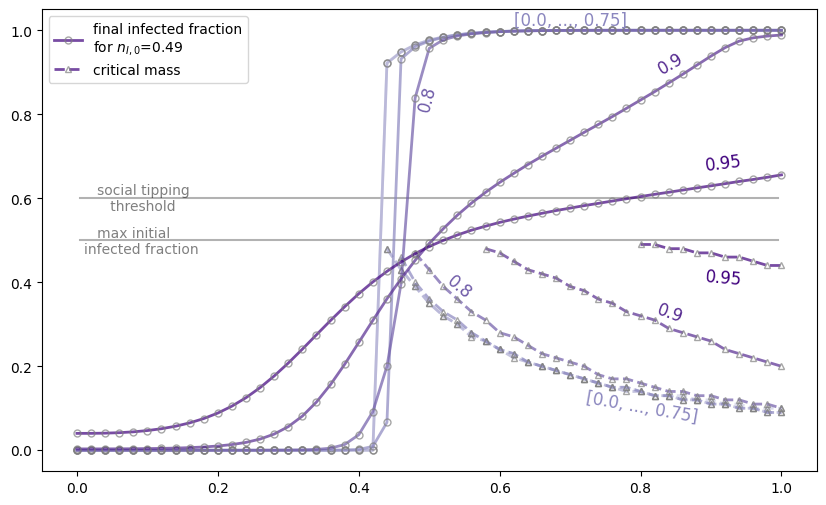

In [40]:
def create_plot3_mean(ax=None,verbose=False):
    
    # use a blue spectrum as the colors
    color = plt.cm.Purples(np.linspace(0.3, 1, len(q_list)))

    if verbose:
        print(f"p_list: {p_list_q}")
        print(f"q_list: {q_list}")
                
    if ax is None:
        fig,ax = plt.subplots(figsize=(10, 6))

    lw = 2.0
    ms = 5.0
    #ax.plot(p_list_q, val_list_q[0], color=color[0])
    for i in range(0,len(q_list)):
        # stable basin
        # >> datapoints
        ax.errorbar(p_list_q,
                    val_list_q[i],
                    marker='o',
                    markersize=ms,
                    linestyle='-',
                    linewidth=lw,
                    color=color[i],
                    markerfacecolor='none',
                    markeredgecolor='grey',
                    alpha=0.7)
        
        # unstable basin
        # >> datapoints
        ax.errorbar(p_list_q,
                    crit_list_q[i],
                    marker='^',
                    markersize=ms,
                    linestyle='--',
                    linewidth=lw,
                    color=color[i],
                    markerfacecolor='none',
                    markeredgecolor='grey',
                    alpha=0.7)
        mask_us = ~np.isnan(crit_list_q[i])

    # add a horizontal line at y=0.5
    ax.axhline(y=0.5, xmin=0.05, xmax=0.95, color='k', linestyle='-', alpha=0.3)
    ax.annotate('\n   max initial\ninfected fraction', xy=(0.01, 0.5), xytext=(0, 5.0),
                textcoords='offset points', color='k', fontsize=10, va='center', alpha=0.5)
    ax.axhline(y=0.6, xmin=0.05, xmax=0.95, color='k', linestyle='-', alpha=0.3)
    ax.annotate('   social tipping\n      threshold', xy=(0.01, 0.6), xytext=(0, 0),
                textcoords='offset points', color='k', fontsize=10, va='center', alpha=0.5)
    # add legend for solid and dashed lines
    ax.plot([], [], 
                marker='o',
                markersize=ms,
                linestyle='-',
                linewidth=lw,
                markerfacecolor='none',
                markeredgecolor='grey',
                color=color[-1],
                alpha = 0.7,
                label='final infected fraction\nfor'+r' $n_{I,0}$=0.49',
                )
    ax.plot([], [], 
                marker='^',
                markersize=ms,
                linestyle='--',
                linewidth=lw,
                markerfacecolor='none',
                markeredgecolor='grey',
                color=color[-1],
                alpha = 0.7,
                label='critical mass',
                )

    # add annotations
    ax.annotate(f'{q_list[-1]}', xy=(p_list_q[-5], val_list_q[-1][-5]), xytext=(-15, 15),
                    textcoords='offset points', color=color[-1], fontsize=12, va='center', rotation=7)
    ax.annotate(f'{q_list[-2]}', xy=(p_list_q[-10], val_list_q[-2][-10]), xytext=(0, 20),
                    textcoords='offset points', color=color[-2], fontsize=12, va='center', rotation=30)
    ax.annotate(f'{q_list[-3]}', xy=(p_list_q[-27], val_list_q[-3][-27]), xytext=(0, 0),
                    textcoords='offset points', color=color[-3], fontsize=12, va='center', rotation=75)
    ax.annotate(f'[0.0, ..., 0.75]', xy=(p_list_q[-20], val_list_q[-4][-20]), xytext=(0, 8),
                    textcoords='offset points', color=color[-4], fontsize=12, va='center', rotation=-00)

    ax.annotate(f'{q_list[-1]}', xy=(p_list_q[-5], crit_list_q[-1][-5]), xytext=(-15, -15),
                    textcoords='offset points', color=color[-1], fontsize=12, va='center', rotation=-5)
    ax.annotate(f'{q_list[-2]}', xy=(p_list_q[-10], crit_list_q[-2][-10]), xytext=(0, 5),
                    textcoords='offset points', color=color[-2], fontsize=12, va='center', rotation=-20)
    ax.annotate(f'{q_list[-3]}', xy=(p_list_q[-25], crit_list_q[-3][-25]), xytext=(0, -0),
                    textcoords='offset points', color=color[-3], fontsize=12, va='center', rotation=-40)
    ax.annotate(f'[0.0, ..., 0.75]', xy=(p_list_q[-15], crit_list_q[-4][-15]), xytext=(0, -20),
                    textcoords='offset points', color=color[-4], fontsize=12, va='center', rotation=-10)

    # add labels and title
    if ax is None:
        ax.xlabel(r'Exposure Probability $p$', fontsize=14)
        ax.ylabel(r'Infected Fraction $n_{I}$', fontsize=14)
        ax.title('Dependence of Infected Fraction on Rewiring Probability $q$', fontsize=16)
    ax.legend()
    # create plot
    if ax is None:
        plt.savefig('../img/Ch4_q-dep.png')
        plt.show()

create_plot3_mean(verbose=True)

## Dependence on $\tau$

In [41]:
fn = 'tau-dep_mean.pkl'
df_tau = pd.read_pickle(fn)
# rund all the values in colum 'nu'
df_tau['nu'] = df_tau['nu'].apply(lambda x: round(x,2))
# delete all rows with tau not in nu_list
tau_list = np.array([0.05,0.2,0.6,1.0])
df_tau = df_tau[df_tau['nu'].isin(tau_list)]

display(df_tau)

,n,nu,p,ni,runtime,sample size
0,0.01,0.05,0.00,0.000006,1000,500
1,0.01,0.05,0.02,0.000006,1000,500
2,0.01,0.05,0.04,0.000006,1000,500
3,0.01,0.05,0.06,0.000006,1000,500
4,0.01,0.05,0.08,0.000006,1000,500
...,...,...,...,...,...,...
49975,0.49,1.00,0.92,1.000000,1000,500
49976,0.49,1.00,0.94,1.000000,1000,500
49977,0.49,1.00,0.96,1.000000,1000,500
49978,0.49,1.00,0.98,1.000000,1000,500


In [42]:
fix_param = {}
x_param = 'p'
y_param = 'nu'
p_list_tau, _, crit_list_tau = cc.heatmap_criticalmass(df_tau,
                                                    fix_param,
                                                    x_param,
                                                    y_param,
                                                    cm_param='n',
                                                    target_column='ni',
                                                    I_threshold=0.6,
                                                    show=False,
                                                    nmax=1,
                                                    )
# replace vluae -1 with NaN in crit_list
crit_list_tau = np.where(crit_list_tau == -1, np.nan, crit_list_tau)

fix_param = {'n': 0.49}
p_list_tau, _, val_list_tau = cc.heatmap_fromDF(df_tau,
                                             fix_param,
                                             x_param,
                                             y_param,
                                             val_param='ni',
                                             show=False,
                                             )

print(f"p_list: {p_list_tau}")
print(f"tau_list: {tau_list}")


p_list: [0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]
tau_list: [0.05 0.2  0.6  1.  ]


p_list: [0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]
tau_list: [0.05 0.2  0.6  1.  ]
[0.88 0.9  0.92]
[9.99999967e-001 8.25089629e-322 9.99999999e-001]


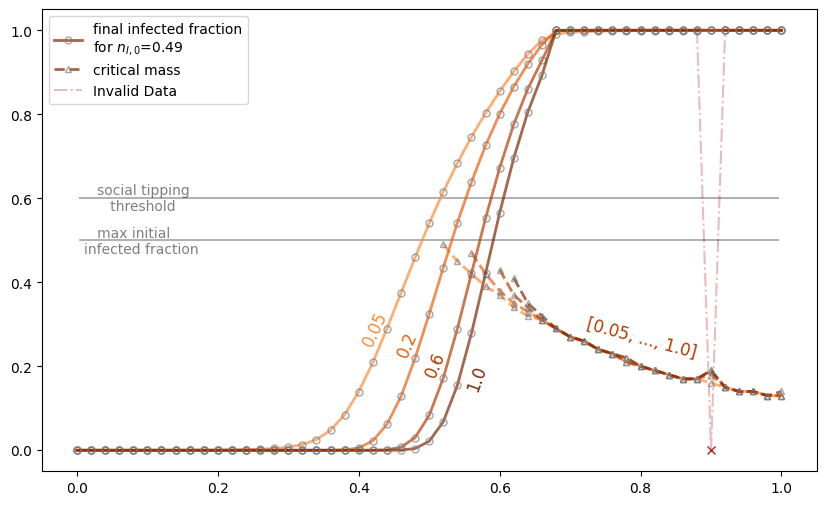

In [43]:
def create_plot4_mean(ax=None,verbose=False):
    
    # use a blue spectrum as the colors
    color = plt.cm.Oranges(np.linspace(0.5, 1.0, len(tau_list)))

    if verbose:
        print(f"p_list: {p_list_tau}")
        print(f"tau_list: {tau_list}")
                
    if ax is None:
        fig,ax = plt.subplots(figsize=(10, 6))

    lw = 2.0
    ms = 5.0
    #ax.plot(p_list_q, val_list_q[0], color=color[0])
    for i in range(0,len(tau_list)):
        if tau_list[i] == 0.6:
            # plot value at [-6] as a wrong value
            ax.plot(p_list_tau[-6],
                    val_list_tau[i,-6],
                    linestyle='-.',
                    marker='x',
                    color='firebrick',
                    )
            print(p_list_tau[-6-1:-6+2])
            print(val_list_tau[i,-6-1:-6+2])
            ax.plot(p_list_tau[-6-1:-6+2],
                    val_list_tau[i,-6-1:-6+2],
                    linestyle='-.',
                    color='firebrick',
                    marker='none',
                    alpha = 0.3,
                    )
            val_list_tau[i,-6] = np.nan
                    # stable basin
                    # >> datapoints
        ax.errorbar(p_list_tau,
                    val_list_tau[i],
                    marker='o',
                    markersize=ms,
                    linestyle='-',
                    linewidth=lw,
                    color=color[i],
                    markerfacecolor='none',
                    markeredgecolor='grey',
                    alpha=0.7)
        
        # unstable basin
        # >> datapoints
        ax.errorbar(p_list_tau,
                    crit_list_tau[i],
                    marker='^',
                    markersize=ms,
                    linestyle='--',
                    linewidth=lw,
                    color=color[i],
                    markerfacecolor='none',
                    markeredgecolor='grey',
                    alpha=0.7)
        mask_us = ~np.isnan(crit_list_tau[i])

    # add a horizontal line at y=0.5
    ax.axhline(y=0.5, xmin=0.05, xmax=0.95, color='k', linestyle='-', alpha=0.3)
    ax.annotate('\n   max initial\ninfected fraction', xy=(0.01, 0.5), xytext=(0, 5.0),
                textcoords='offset points', color='k', fontsize=10, va='center', alpha=0.5)
    ax.axhline(y=0.6, xmin=0.05, xmax=0.95, color='k', linestyle='-', alpha=0.3)
    ax.annotate('   social tipping\n      threshold', xy=(0.01, 0.6), xytext=(0, 0),
                textcoords='offset points', color='k', fontsize=10, va='center', alpha=0.5)
    # add legend for solid and dashed lines
    ax.plot([], [], 
                marker='o',
                markersize=ms,
                linestyle='-',
                linewidth=lw,
                markerfacecolor='none',
                markeredgecolor='grey',
                color=color[-1],
                alpha = 0.7,
                label='final infected fraction\nfor'+r' $n_{I,0}$=0.49',
                )
    ax.plot([], [], 
                marker='^',
                markersize=ms,
                linestyle='--',
                linewidth=lw,
                markerfacecolor='none',
                markeredgecolor='grey',
                color=color[-1],
                alpha = 0.7,
                label='critical mass',
                )
    ax.plot([],[],
            linestyle='-.',
            color='firebrick',
            marker='none',
            alpha = 0.3,
            label=f'Invalid Data',
            )

    # add annotations
    ax.annotate(f'{tau_list[0]}', xy=(p_list_tau[-29], val_list_tau[0][-29]), xytext=(-20, 0),
                textcoords='offset points', color=color[0], fontsize=12, va='center', rotation=65)
    ax.annotate(f'{tau_list[1]}', xy=(p_list_tau[-27], val_list_tau[1][-27]), xytext=(-15, 10),
                textcoords='offset points', color=color[1], fontsize=12, va='center', rotation=67)
    ax.annotate(f'{tau_list[2]}', xy=(p_list_tau[-25], val_list_tau[2][-25]), xytext=(-15, 10),
                textcoords='offset points', color=color[2], fontsize=12, va='center', rotation=67)
    ax.annotate(f'{tau_list[3]}', xy=(p_list_tau[-24], val_list_tau[3][-24]), xytext=(5, 5),
                textcoords='offset points', color=color[3], fontsize=12, va='center', rotation=70)

    ax.annotate(f'[0.05, ..., 1.0]', xy=(p_list_tau[-15], crit_list_tau[3][-15]), xytext=(0, 2),
                textcoords='offset points', color=color[2], fontsize=12, va='center', rotation=-15)

    # add labels and title
    if ax is None:
        ax.xlabel(r'Exposure Probability $p$', fontsize=14)
        ax.ylabel(r'Infected Fraction $n_{I}$', fontsize=14)
        ax.title('Dependence of Infected Fraction on Rewiring Probability $q$', fontsize=16)
    ax.legend()
    # create plot
    if ax is None:
        plt.savefig('../img/Ch4_tau-dep.png')
        plt.show()

create_plot4_mean(verbose=True)

## T Dependency with fixed $T\tau=0.6$ 

In [44]:
fn = 'T-tau-dep_mean.pkl'
df_T = pd.read_pickle(fn)

display(df_T)

,n,T,nu,p,ni,runtime,sample size
0,0.01,5,0.12,0.00,-1.461683e-09,1000,500
1,0.01,5,0.12,0.02,3.853651e-10,1000,500
2,0.01,5,0.12,0.04,-1.893608e-09,1000,500
3,0.01,5,0.12,0.06,-1.216031e-09,1000,500
4,0.01,5,0.12,0.08,4.388013e-11,1000,500
...,...,...,...,...,...,...,...
14989,0.49,20,0.03,0.92,9.942953e-01,1000,500
14990,0.49,20,0.03,0.94,9.943044e-01,1000,500
14991,0.49,20,0.03,0.96,9.943115e-01,1000,500
14992,0.49,20,0.03,0.98,9.943171e-01,1000,500


In [45]:
fix_param = {}
x_param = 'p'
y_param = 'T'
p_list_T, T_list, crit_list_T = cc.heatmap_criticalmass(df_T,
                                                    fix_param,
                                                    x_param,
                                                    y_param,
                                                    cm_param='n',
                                                    target_column='ni',
                                                    I_threshold=0.6,
                                                    show=False,
                                                    nmax=1,
                                                    )
# replace vluae -1 with NaN in crit_list
crit_list_T = np.where(crit_list_T == -1, np.nan, crit_list_T)

fix_param = {'n': 0.49}
p_list_T, T_list, val_list_T = cc.heatmap_fromDF(df_T,
                                             fix_param,
                                             x_param,
                                             y_param,
                                             val_param='ni',
                                             show=False,
                                             )


print(f"p_list: {p_list_T}")
print(f"T_list: {T_list}")

p_list: [0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]
T_list: [ 5  7 10 12 15 20]


p_list: [0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]
T_list: [ 5  7 10 12 15 20]


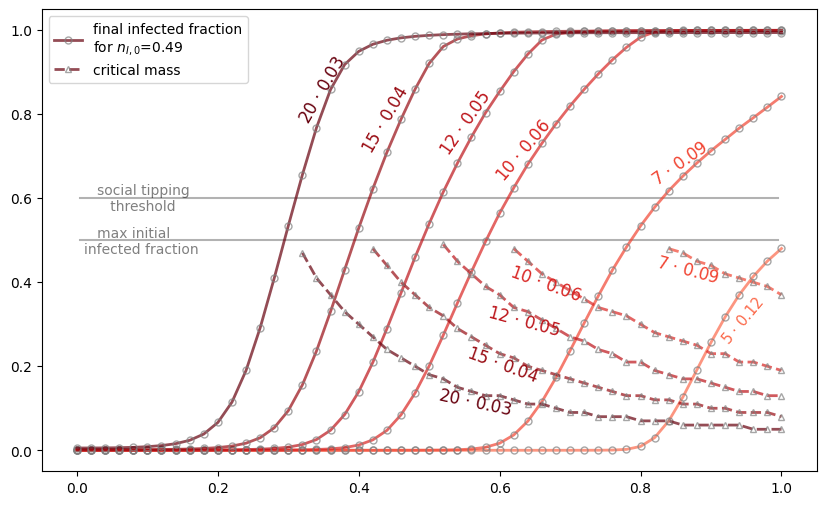

In [46]:
def create_plot5_mean(ax=None,verbose=False):
    
    # use a blue spectrum as the colors
    color = plt.cm.Reds(np.linspace(0.5, 1, len(T_list)))

    if verbose:
        print(f"p_list: {p_list_T}")
        print(f"T_list: {T_list}")
                
    if ax is None:
        fig,ax = plt.subplots(figsize=(10, 6))

    lw = 2.0
    ms = 5.0
    #ax.plot(p_list_q, val_list_q[0], color=color[0])
    for i in range(0,len(T_list)):
        # stable basin
        # >> datapoints
        ax.errorbar(p_list_T,
                    val_list_T[i],
                    marker='o',
                    markersize=ms,
                    linestyle='-',
                    linewidth=lw,
                    color=color[i],
                    markerfacecolor='none',
                    markeredgecolor='grey',
                    alpha=0.7)
        
        # unstable basin
        # >> datapoints
        ax.errorbar(p_list_T,
                    crit_list_T[i],
                    marker='^',
                    markersize=ms,
                    linestyle='--',
                    linewidth=lw,
                    color=color[i],
                    markerfacecolor='none',
                    markeredgecolor='grey',
                    alpha=0.7)
        mask_us = ~np.isnan(crit_list_T[i])

    # add a horizontal line at y=0.5
    ax.axhline(y=0.5, xmin=0.05, xmax=0.95, color='k', linestyle='-', alpha=0.3)
    ax.annotate('\n   max initial\ninfected fraction', xy=(0.01, 0.5), xytext=(0, 5.0),
                textcoords='offset points', color='k', fontsize=10, va='center', alpha=0.5)
    ax.axhline(y=0.6, xmin=0.05, xmax=0.95, color='k', linestyle='-', alpha=0.3)
    ax.annotate('   social tipping\n      threshold', xy=(0.01, 0.6), xytext=(0, 0),
                textcoords='offset points', color='k', fontsize=10, va='center', alpha=0.5)
    # add legend for solid and dashed lines
    ax.plot([], [], 
                marker='o',
                markersize=ms,
                linestyle='-',
                linewidth=lw,
                markerfacecolor='none',
                markeredgecolor='grey',
                color=color[-1],
                alpha = 0.7,
                label='final infected fraction\nfor'+r' $n_{I,0}$=0.49',
                )
    ax.plot([], [], 
                marker='^',
                markersize=ms,
                linestyle='--',
                linewidth=lw,
                markerfacecolor='none',
                markeredgecolor='grey',
                color=color[-1],
                alpha = 0.7,
                label='critical mass',
                )

    # add annotations
    ax.annotate(f'{T_list[-1]} $\\cdot$ {np.round(0.6/T_list[-1],2)}', xy=(p_list_T[-33], val_list_T[-1][-33]), xytext=(-25, 0),
                textcoords='offset points', color=color[-1], fontsize=12, va='center', rotation=60)
    ax.annotate(f'{T_list[-2]} $\\cdot$ {np.round(0.6/T_list[-2],2)}', xy=(p_list_T[-28], val_list_T[-2][-28]), xytext=(-30, 0),
                textcoords='offset points', color=color[-2], fontsize=12, va='center', rotation=60)
    ax.annotate(f'{T_list[-3]} $\\cdot$ {np.round(0.6/T_list[-3],2)}', xy=(p_list_T[-23], val_list_T[-3][-23]), xytext=(-25, 10),
                textcoords='offset points', color=color[-3], fontsize=12, va='center', rotation=55)
    ax.annotate(f'{T_list[-4]} $\\cdot$ {np.round(0.6/T_list[-4],2)}', xy=(p_list_T[-19], val_list_T[-4][-19]), xytext=(-25, 10),
                textcoords='offset points', color=color[-4], fontsize=12, va='center', rotation=50)
    ax.annotate(f'{T_list[-5]} $\\cdot$ {np.round(0.6/T_list[-5],2)}', xy=(p_list_T[-7], val_list_T[-5][-7]), xytext=(-35, 0),
                textcoords='offset points', color=color[-5], fontsize=12, va='center', rotation=35)
    ax.annotate(f'{T_list[-6]} $\\cdot$ {np.round(0.6/T_list[-6],2)}', xy=(p_list_T[-5], val_list_T[-6][-5]), xytext=(-5, -2),
                textcoords='offset points', color=color[-6], fontsize=10.5, va='center', rotation=50)

    ax.annotate(f'{T_list[-1]} $\\cdot$ {np.round(0.6/T_list[-1],2)}', xy=(p_list_T[-26], crit_list_T[-1][-26]), xytext=(5, -20),
                textcoords='offset points', color=color[-1], fontsize=12, va='center', rotation=-12)
    ax.annotate(f'{T_list[-2]} $\\cdot$ {np.round(0.6/T_list[-2],2)}', xy=(p_list_T[-23], crit_list_T[-2][-23]), xytext=(-5, -20),
                textcoords='offset points', color=color[-2], fontsize=12, va='center', rotation=-20)
    ax.annotate(f'{T_list[-3]} $\\cdot$ {np.round(0.6/T_list[-3],2)}', xy=(p_list_T[-22], crit_list_T[-3][-22]), xytext=(0, -25),
                textcoords='offset points', color=color[-3], fontsize=12, va='center', rotation=-15)
    ax.annotate(f'{T_list[-4]} $\\cdot$ {np.round(0.6/T_list[-4],2)}', xy=(p_list_T[-20], crit_list_T[-4][-20]), xytext=(-5, -25),
                textcoords='offset points', color=color[-4], fontsize=12, va='center', rotation=-20)
    ax.annotate(f'{T_list[-5]} $\\cdot$ {np.round(0.6/T_list[-5],2)}', xy=(p_list_T[-9], crit_list_T[-5][-9]), xytext=(-10, -15),
                textcoords='offset points', color=color[-5], fontsize=12, va='center', rotation=-15)

    # add labels and title
    if ax is None:
        ax.xlabel(r'Exposure Probability $p$', fontsize=14)
        ax.ylabel(r'Infected Fraction $n_{I}$', fontsize=14)
        ax.title('Dependence of Infected Fraction on Rewiring Probability $q$', fontsize=16)
    ax.legend()
    # create plot
    if ax is None:
        plt.savefig('../img/Ch4_T-dep.png')
        plt.show()

create_plot5_mean(verbose=True)

## Aggregate Plots

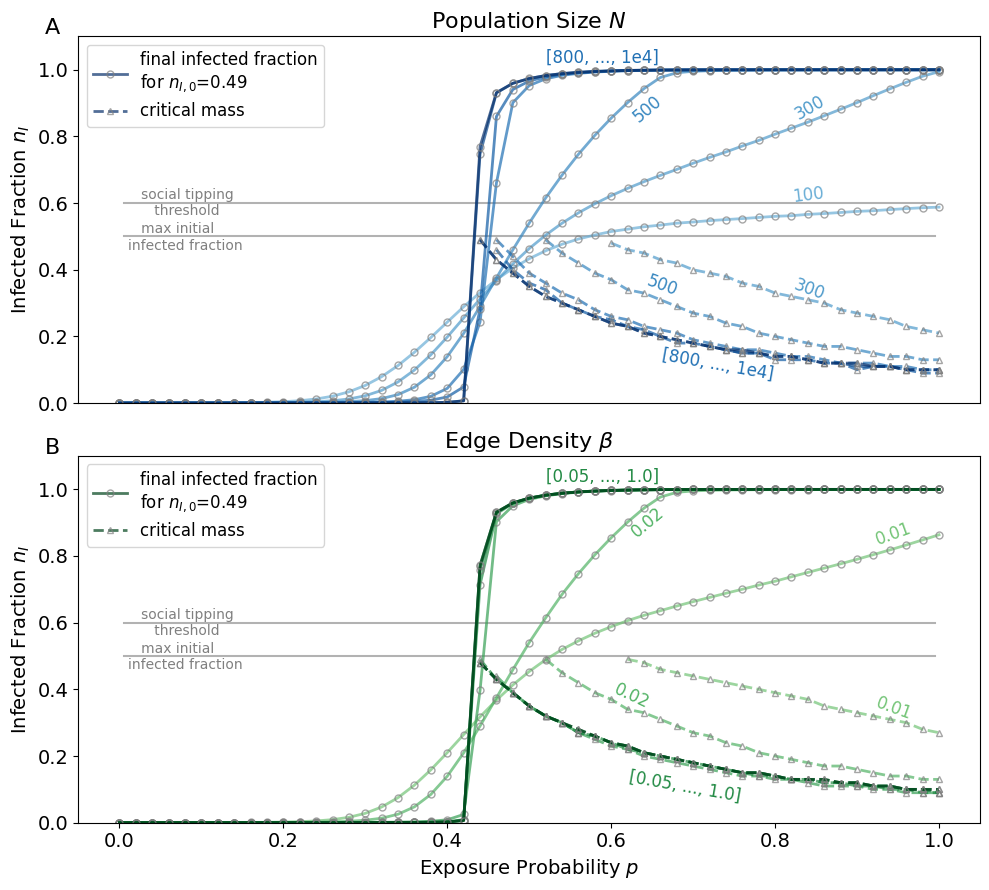

In [47]:
# N and beta in one plot
fig, axs = plt.subplots(2, 1, figsize=(10, 9))
create_plot1_mean(ax=axs[0])
create_plot2_mean(ax=axs[1])

# set labels
axs[0].set_ylabel(r'Infected Fraction $n_{I}$', fontsize=14)
axs[1].set_ylabel(r'Infected Fraction $n_{I}$', fontsize=14)
axs[1].set_xlabel(r'Exposure Probability $p$', fontsize=14)
#axs[1,1].set_xlabel(r'Exposure Probability $p$', fontsize=14)

# set subplot titles
axs[0].set_title('Population Size $N$', fontsize=16)
axs[1].set_title('Edge Density $\\beta$', fontsize=16)

# set axis lim
axs[0].set_ylim(0,1.1)
axs[1].set_ylim(0,1.1)

# set ticks
axs[0].set_xticks([])

# Set the same fontsize for all axes
fontsize = 14
for ax in axs.flat:
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(fontsize)

# add A,B,C,D label
axs[0].text(-0.02, 1.05, 'A', transform=axs[0].transAxes, fontsize=16, va='top', ha='right')
axs[1].text(-0.02, 1.05, 'B', transform=axs[1].transAxes, fontsize=16, va='top', ha='right')

axs[0].legend(fontsize=12)
axs[1].legend(fontsize=12)
plt.tight_layout()

plt.savefig('../img/Ch4_Network-dep.png')
plt.show()


[0.88 0.9  0.92]
[0.99999997        nan 1.        ]


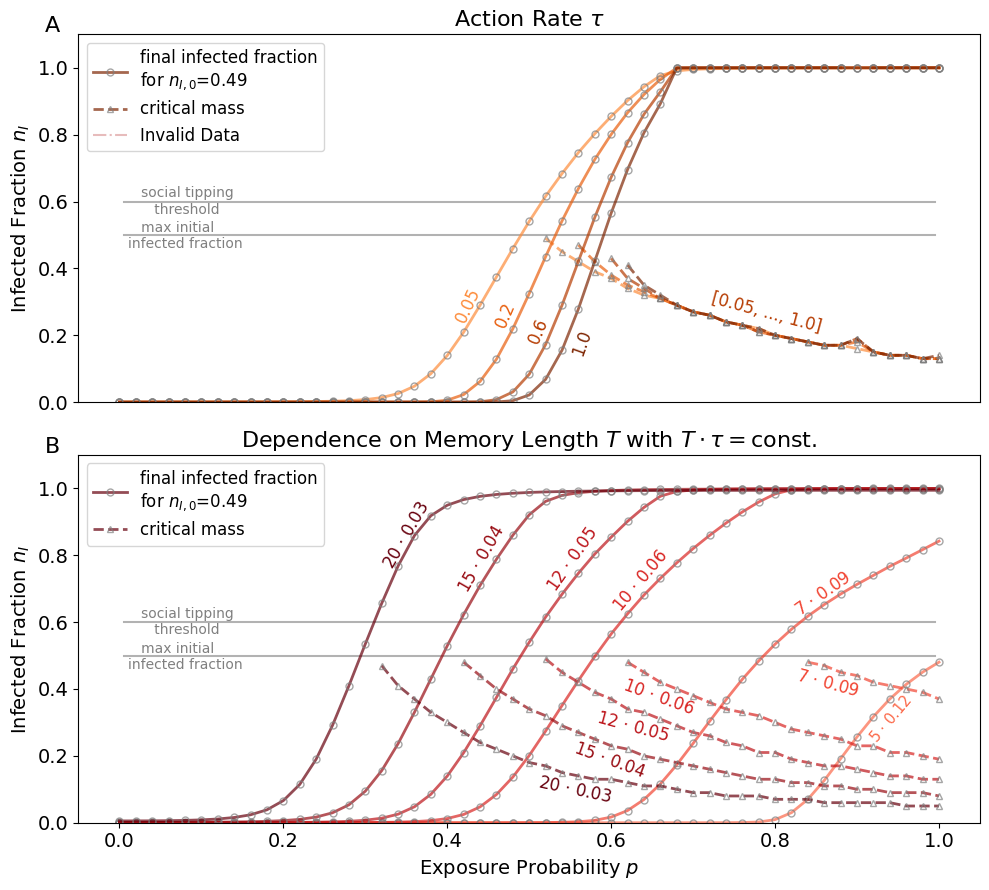

In [48]:
# tau and T-tau in one plot
fig, axs = plt.subplots(2, 1, figsize=(10, 9))
create_plot4_mean(ax=axs[0])
create_plot5_mean(ax=axs[1])

# set labels
axs[0].set_ylabel(r'Infected Fraction $n_{I}$', fontsize=14)
axs[1].set_ylabel(r'Infected Fraction $n_{I}$', fontsize=14)
axs[1].set_xlabel(r'Exposure Probability $p$', fontsize=14)

# set subplot titles
axs[0].set_title('Action Rate $\\tau$', fontsize=16)
axs[1].set_title('Dependence on Memory Length $T$ with $T\\cdot\\tau=$const.', fontsize=16)
# set axis lim
axs[0].set_ylim(0,1.1)
axs[1].set_ylim(0,1.1)

# set ticks
axs[0].set_xticks([])

# Set the same fontsize for all axes
fontsize = 14
for ax in axs.flat:
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(fontsize)

# add A,B label
axs[0].text(-0.02, 1.05, 'A', transform=axs[0].transAxes, fontsize=16, va='top', ha='right')
axs[1].text(-0.02, 1.05, 'B', transform=axs[1].transAxes, fontsize=16, va='top', ha='right')

axs[0].legend(fontsize=12)
axs[1].legend(fontsize=12)
plt.tight_layout()

plt.savefig('../img/Ch4_Time-dep.png')
plt.show()

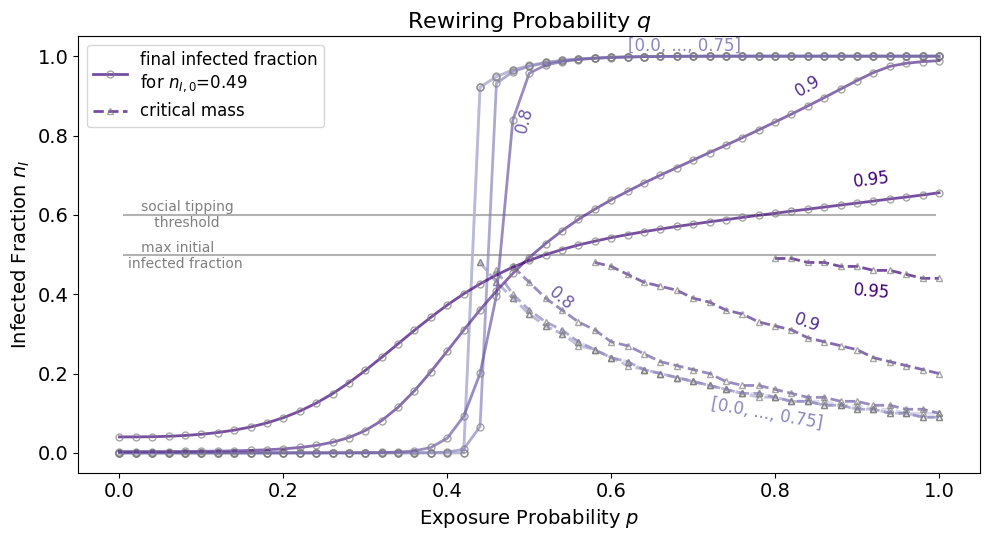

In [49]:
fig,axs = plt.subplots(1,1,figsize=(10,5.5))
create_plot3_mean(ax=axs)

# set labels
axs.set_ylabel(r'Infected Fraction $n_{I}$', fontsize=14)
axs.set_xlabel(r'Exposure Probability $p$', fontsize=14)
axs.set_title('Rewiring Probability $q$', fontsize=16)

# set ticks size
fontsize = 14
for label in axs.get_xticklabels() + axs.get_yticklabels():
    label.set_fontsize(fontsize)
    
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('../img/Ch4_q-dep.png')
plt.show()

### Finite Size Scaling

Assumed scaling realtion as in [Holme & Newman, 2006] :

$$ S = N^{-a} F \left( N^b(q -q_c) \right)  $$

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '../')
import cclib as cc
import cde

In [53]:
# import exp07 data
# - coarse data
fn = './fragtrans_compress300.pkl'
df_ft = pd.read_pickle(fn)

# round all entries in the columns 'p' and 'q' to 2 decimal places
df_ft['p'] = df_ft['p'].round(2)
df_ft['q'] = df_ft['q'].round(2)

# add a column that contains 1-ni_mean
df_ft['1-ni_mean'] = 1 - df_ft['ni_mean']
# add a column that contains the maximum of the two columns 'ni_mean' and '1-ni_mean', multiplitied by the vallue in N
df_ft['S'] = df_ft[['ni_mean','1-ni_mean']].max(axis=1) * df_ft['N']

display(df_ft)

# - fine data
fn_fine = './fragtrans_fine.pkl'
ft_fine = pd.read_pickle(fn_fine)

# round all entries in the columns 'p' and 'q' to 2 decimal places
ft_fine['p'] = ft_fine['p'].round(4)
ft_fine['q'] = ft_fine['q'].round(4)

# add a column that contains 1-ni_mean
ft_fine['1-ni_mean'] = 1 - ft_fine['ni_mean']
# add a column that contains the maximum of the two columns 'ni_mean' and '1-ni_mean', multiplitied by the vallue in N
ft_fine['S'] = ft_fine[['ni_mean','1-ni_mean']].max(axis=1) * ft_fine['N']

display(ft_fine)

,N,p,q,ni_mean,ni_std,mi_mean,mi_std,ms_mean,ms_std,runtime_mean,runtime_std,num_samples,1-ni_mean,S
0,100.0,0.0,0.00,-1.869112e-11,3.162440e-12,-1.422322e-15,1.739682e-14,0.990000,1.433193e-11,1000.0,0.0,34,1.000000,100.000000
1,100.0,0.0,0.01,-1.911870e-11,4.754703e-12,-7.026059e-13,2.737242e-12,0.990000,3.416468e-11,1000.0,0.0,34,1.000000,100.000000
2,100.0,0.0,0.02,-2.200146e-11,1.043919e-12,-5.486757e-14,2.740519e-12,0.990000,4.352072e-11,1000.0,0.0,34,1.000000,100.000000
3,100.0,0.0,0.03,-2.160332e-11,6.569150e-12,1.367878e-12,5.915523e-12,0.990000,5.920982e-11,1000.0,0.0,34,1.000000,100.000000
4,100.0,0.0,0.04,-2.340002e-11,5.027961e-12,7.870234e-12,2.612195e-11,0.990000,8.031913e-11,1000.0,0.0,34,1.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71402,10000.0,1.0,0.96,9.305275e-01,2.289956e-06,8.762611e+01,6.448326e-03,1.530782,6.823653e-04,1000.0,0.0,33,0.069473,9305.274641
71403,10000.0,1.0,0.97,8.854028e-01,5.190828e-06,8.030056e+01,1.432394e-02,3.224134,2.165872e-03,1000.0,0.0,33,0.114597,8854.028434
71404,10000.0,1.0,0.98,8.107829e-01,1.069814e-05,6.917077e+01,1.757817e-02,7.017949,6.060289e-03,1000.0,0.0,33,0.189217,8107.828603
71405,10000.0,1.0,0.99,6.867668e-01,2.506740e-05,5.319768e+01,2.399841e-02,15.842134,1.587486e-02,1000.0,0.0,33,0.313233,6867.668172


,N,p,q,ni_mean,ni_std,mi_mean,mi_std,ms_mean,ms_std,runtime_mean,runtime_std,num_samples,1-ni_mean,S
0,100.0,0.41,0.900,0.329831,0.002318,0.323246,0.013801,0.661306,0.014087,1000.0,0.0,62,0.670169,67.016904
1,100.0,0.41,0.901,0.331253,0.002258,0.325212,0.013021,0.659368,0.013287,1000.0,0.0,62,0.668747,66.874684
2,100.0,0.41,0.902,0.332567,0.002419,0.325626,0.014589,0.659015,0.014884,1000.0,0.0,62,0.667433,66.743301
3,100.0,0.41,0.903,0.333788,0.002165,0.326022,0.013468,0.658679,0.013737,1000.0,0.0,62,0.666212,66.621160
4,100.0,0.41,0.904,0.335228,0.001971,0.327221,0.012522,0.657525,0.012769,1000.0,0.0,62,0.664772,66.477213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3530,10000.0,0.43,0.996,0.486390,0.000063,32.417109,0.030909,35.139030,0.036204,1000.0,0.0,61,0.513610,5136.098726
3531,10000.0,0.43,0.997,0.487277,0.000041,32.764746,0.025318,35.304564,0.033280,1000.0,0.0,61,0.512723,5127.230028
3532,10000.0,0.43,0.998,0.488171,0.000032,33.112753,0.032648,35.473730,0.035360,1000.0,0.0,61,0.511829,5118.294765
3533,10000.0,0.43,0.999,0.489076,0.000021,33.471964,0.037095,35.654190,0.042159,1000.0,0.0,61,0.510924,5109.240338


/tmp/ipykernel_9324/3076096800.py:51: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  marker=markers[int(np.argwhere(N_list == N)[0])],
/tmp/ipykernel_9324/3076096800.py:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  marker=markers[int(np.argwhere(N_list == N)[0])],
/tmp/ipykernel_9324/3076096800.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


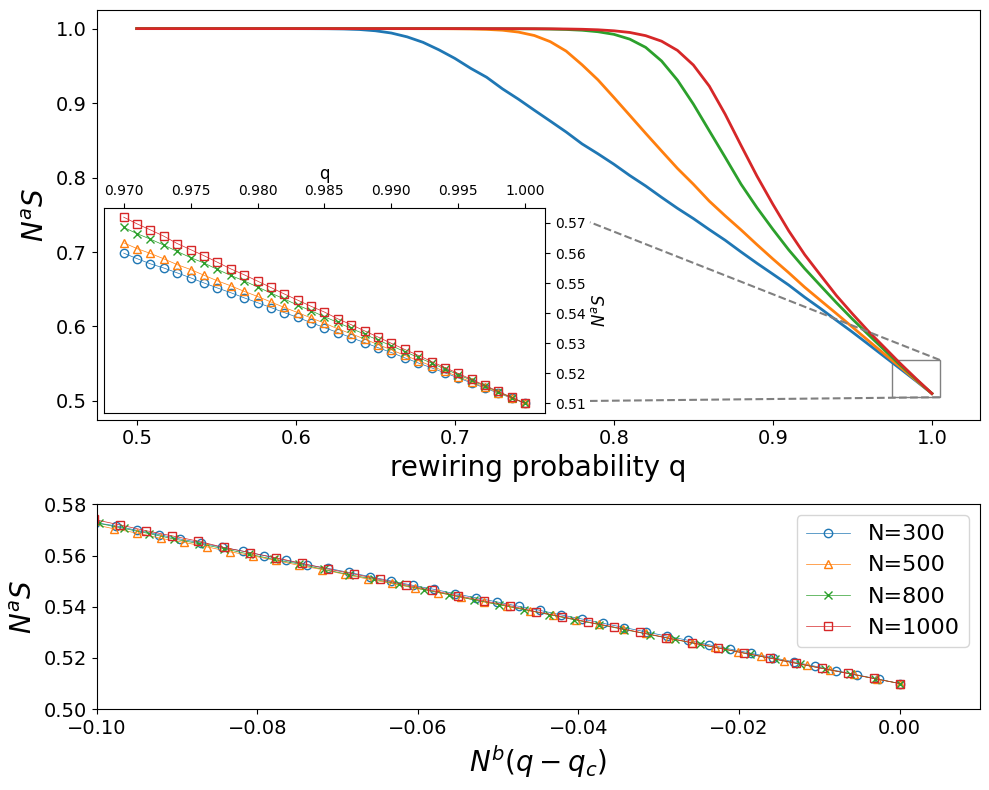

In [54]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

N_list = ft_fine['N'].unique()
# remove N=100,5000,10000
N_list = N_list[N_list != 100]
N_list = N_list[N_list!=5000]
N_list = N_list[N_list!=10000]
markers = ['o', '^', 'x', 's', 'd', 'v', '<', '>', 'p', 'h']

p = 0.42
q_c = 1.0
a = 1.
b = 0.17

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10,8), gridspec_kw={'height_ratios': [2,1]})

# Main Plot a
ax = axs[0]
for N in N_list:
    df_N = df_ft[df_ft['N'] == N]
    q_list = df_N['q'].unique()
    S_N = df_N.pivot(index='q', columns='p', values='S').values
    i_p = np.argwhere(df_N['p'].unique() == p)[0][0]
    ax.plot(q_list[50:],
            S_N[50:, i_p] * N**-a,
            linewidth=2,
            label=f'N={int(N)}',
            )
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('rewiring probability q', fontsize=20)
ax.set_ylabel(r'$N^aS$', fontsize=20)
# Add a box around x=1 and y=0.5
rect = plt.Rectangle((0.975, 0.505), 0.03, 0.05, linewidth=1, edgecolor='grey', facecolor='none')
ax.add_patch(rect)

# Add lines connecting the corners of the box to the inset plot
con1 = plt.Line2D([1.005, 0.785], [0.505, 0.5], transform=ax.transData, color='grey', linestyle='--')
con2 = plt.Line2D([1.005, 0.785], [0.555, 0.74], transform=ax.transData, color='grey', linestyle='--')
ax.add_line(con1)
ax.add_line(con2)

# Inset Plot
ax_inset = inset_axes(ax, width="50%", height="50%", loc='lower left')
for N in N_list:
    df_N = ft_fine[ft_fine['N'] == N]
    q_list = df_N['q'].unique()
    S_N = df_N.pivot(index='q', columns='p', values='S').values
    i_p = np.argwhere(df_N['p'].unique() == p)[0][0]
    ax_inset.plot(q_list[70:],
                  S_N[70:, i_p] * N**-a,
                  marker=markers[int(np.argwhere(N_list == N)[0])],
                  markerfacecolor='none',
                  linewidth=0.5,
                  )
ax_inset.tick_params(axis='both', which='major', labelsize=10, labelright=True, labeltop=True, labelleft=False, labelbottom=False)
ax_inset.xaxis.set_label_position('top')
ax_inset.yaxis.set_label_position('right')
ax_inset.xaxis.tick_top()
ax_inset.yaxis.tick_right()
ax_inset.set_xlabel('q', fontsize=12)
ax_inset.set_ylabel(r'$N^aS$', fontsize=12)

# Main Plot b
ax = axs[1]
for N in N_list:
    df_N = ft_fine[ft_fine['N'] == N]
    q_list = df_N['q'].unique()
    S_N = df_N.pivot(index='q', columns='p', values='S').values
    i_p = np.argwhere(df_N['p'].unique() == p)[0][0]
    ax.plot(N**b * (q_list[:] - q_c),
            S_N[:, i_p] * N**-a,
            marker=markers[int(np.argwhere(N_list == N)[0])],
            markerfacecolor='none',
            linewidth=0.5,
            label=f'N={int(N)}',
            )
ax.tick_params(axis='both', which='major', labelsize=14)#
ax.set_xlim(-0.1, 0.01)
ax.set_ylim(0.5,0.58)
ax.set_xlabel(r'$N^b \left(q-q_c\right)$',fontsize=20)
ax.set_ylabel(r'$N^aS$',fontsize=20)
ax.legend(loc='upper right',fontsize=16)


plt.tight_layout()
plt.savefig('../img/Ch4_FiniteSizeScaling.png')
plt.show()